In [11]:
from __future__ import annotations
from rich import print
from rich.pretty import pprint
#from rich.text import Text
#from rich.progress import track,\
#    BarColumn, Progress, Task, TaskID, TextColumn, TimeElapsedColumn, TimeRemainingColumn,\
#    MofNCompleteColumn, RenderableColumn, SpinnerColumn, TransferSpeedColumn, FileSizeColumn, ProgressColumn
#from rich.layout import Layout
#from rich.columns import Columns
#from rich.text import Text
#from custom_rich import CustomTaskProgressColumn as TaskProgressColumn
from tqdm.notebook import tqdm
from custom_counter import CustomCounter as Counter, init_byte_counter, ConsumableCounter
from collections import defaultdict, ChainMap, deque
from collections.abc import Iterable, Callable, Hashable, Generator,\
    ItemsView, KeysView, ValuesView, MappingView,\
    Mapping, MutableMapping,\
    Sequence, MutableSequence
from bitarray import bitarray, frozenbitarray
from bitarray.util import ba2int, int2ba, huffman_code, zeros, intervals
from sortedcontainers import SortedSet
from typing import List, Set, Dict, Tuple, Optional, Union, Iterable
from dataclasses import dataclass, field
from operator import attrgetter
from copy import deepcopy, copy
#from delta_of_delta import delta_encode, delta_decode, delta_of_delta_encode, delta_of_delta_decode
from lolviz import objviz, lolviz, listviz, treeviz
from cycle_gen import CMWC
import math
import xxhash
import functools
from itertools import chain
from more_itertools import split_at, mark_ends, stagger, bucket, windowed
from enum import Enum, IntEnum
# https://realpython.com/lru-cache-python/
from functools import lru_cache

from hash_range_iterator import count_data_items, nounce_to_input,\
    bytes_from_digest, int_bytes_from_digest, bytes_from_nounce,\
    int_bytes_from_nounce, int_bits_from_nounce, int_bits_from_digest,\
    last_ba_bits_from_digest, last_ba_bits_from_nounce
from block_types import pick_digest_bytes_from_bitmap, pick_int_digest_bytes_from_bitmap, create_permutation, restore_permutation,\
    create_canonical_section_bitmap_count_codes,\
    create_universal_section_bitmap_group_codes,\
    create_canonical_section_bitmap_positions,\
    create_canonical_section_bitmap_group_codes,\
    get_group_id_bitmaps
from content_based_split import create_value_ranges, ChainedRange

In [13]:
pprint(create_canonical_section_bitmap_group_codes())
#pprint(create_canonical_section_bitmap_positions())
pprint(create_canonical_section_bitmap_count_codes())
pprint(create_universal_section_bitmap_group_codes())

for _group_id in range(1, 8):
    print(_group_id, get_group_id_bitmaps(group_id=_group_id))

{
│   1: bitarray('010'),
│   2: bitarray('110'),
│   3: bitarray('011'),
│   4: bitarray('111'),
│   5: bitarray('00'),
│   6: bitarray('100'),
│   7: bitarray('101')
}

{
│   0: bitarray('1110'),
│   1: bitarray('000'),
│   2: bitarray('1111'),
│   3: bitarray('110'),
│   4: bitarray('001'),
│   5: bitarray('101'),
│   6: bitarray('010'),
│   7: bitarray('100'),
│   8: bitarray('011')
}

{1: bitarray('00'), 2: bitarray('10'), 3: bitarray('01'), 4: bitarray('11')}

1
[
    frozenbitarray('10000000'),
    frozenbitarray('01000000'),
    frozenbitarray('00100000'),
    frozenbitarray('00010000'),
    frozenbitarray('00001000'),
    frozenbitarray('00000100'),
    frozenbitarray('00000010'),
    frozenbitarray('00000001')
]

2
[
    frozenbitarray('11000000'),
    frozenbitarray('10100000'),
    frozenbitarray('10010000'),
    frozenbitarray('10001000'),
    frozenbitarray('10000100'),
    frozenbitarray('10000010'),
    frozenbitarray('10000001'),
    frozenbitarray('01100000'),
    frozenbitarray('01010000'),
    frozenbitarray('01001000'),
    frozenbitarray('01000100'),
    frozenbitarray('01000010'),
    frozenbitarray('01000001'),
    frozenbitarray('00110000'),
    frozenbitarray('00101000'),
    frozenbitarray('00100100'),
    frozenbitarray('00100010'),
    frozenbitarray('00100001'),
    frozenbitarray('00011000'),
    frozenbitarray('00010100'),
    frozenbitarray('00010010'),
    frozenbitarray('00010001'),
    frozenbitarray('00001100'),
    frozenbitarray('00001010'),
    frozenbitarray('00001001'),
    frozenbitarray('00000110'),
    frozenbitarray('00000101'),
    frozenbitarray('00000011')
]

3
[
    frozenbitarray('11100000'),
    frozenbitarray('11010000'),
    frozenbitarray('11001000'),
    frozenbitarray('11000100'),
    frozenbitarray('11000010'),
    frozenbitarray('11000001'),
    frozenbitarray('10110000'),
    frozenbitarray('10101000'),
    frozenbitarray('10100100'),
    frozenbitarray('10100010'),
    frozenbitarray('10100001'),
    frozenbitarray('10011000'),
    frozenbitarray('10010100'),
    frozenbitarray('10010010'),
    frozenbitarray('10010001'),
    frozenbitarray('10001100'),
    frozenbitarray('10001010'),
    frozenbitarray('10001001'),
    frozenbitarray('10000110'),
    frozenbitarray('10000101'),
    frozenbitarray('10000011'),
    frozenbitarray('01110000'),
    frozenbitarray('01101000'),
    frozenbitarray('01100100'),
    frozenbitarray('01100010'),
    frozenbitarray('01100001'),
    frozenbitarray('01011000'),
    frozenbitarray('01010100'),
    frozenbitarray('01010010'),
    frozenbitarray('01010001'),
    frozenbitarray('01001100'),
    frozenbitarray('01001010'),
    frozenbitarray('01001001'),
    frozenbitarray('01000110'),
    frozenbitarray('01000101'),
    frozenbitarray('01000011'),
    frozenbitarray('00111000'),
    frozenbitarray('00110100'),
    frozenbitarray('00110010'),
    frozenbitarray('00110001'),
    frozenbitarray('00101100'),
    frozenbitarray('00101010'),
    frozenbitarray('00101001'),
    frozenbitarray('00100110'),
    frozenbitarray('00100101'),
    frozenbitarray('00100011'),
    frozenbitarray('00011100'),
    frozenbitarray('00011010'),
    frozenbitarray('00011001'),
    frozenbitarray('00010110'),
    frozenbitarray('00010101'),
    frozenbitarray('00010011'),
    frozenbitarray('00001110'),
    frozenbitarray('00001101'),
    frozenbitarray('00001011'),
    frozenbitarray('00000111')
]

4
[
    frozenbitarray('11110000'),
    frozenbitarray('11101000'),
    frozenbitarray('11100100'),
    frozenbitarray('11100010'),
    frozenbitarray('11100001'),
    frozenbitarray('11011000'),
    frozenbitarray('11010100'),
    frozenbitarray('11010010'),
    frozenbitarray('11010001'),
    frozenbitarray('11001100'),
    frozenbitarray('11001010'),
    frozenbitarray('11001001'),
    frozenbitarray('11000110'),
    frozenbitarray('11000101'),
    frozenbitarray('11000011'),
    frozenbitarray('10111000'),
    frozenbitarray('10110100'),
    frozenbitarray('10110010'),
    frozenbitarray('10110001'),
    frozenbitarray('10101100'),
    frozenbitarray('10101010'),
    frozenbitarray('10101001'),
    frozenbitarray('10100110'),
    frozenbitarray('10100101'),
    frozenbitarray('10100011'),
    frozenbitarray('10011100'),
    frozenbitarray('10011010'),
    frozenbitarray('10011001'),
    frozenbitarray('10010110'),
    frozenbitarray('10010101'),
    frozenbitarray('10010011'),
    frozenbitarray('10001110'),
    frozenbitarray('10001101'),
    frozenbitarray('10001011'),
    frozenbitarray('10000111'),
    frozenbitarray('01111000'),
    frozenbitarray('01110100'),
    frozenbitarray('01110010'),
    frozenbitarray('01110001'),
    frozenbitarray('01101100'),
    frozenbitarray('01101010'),
    frozenbitarray('01101001'),
    frozenbitarray('01100110'),
    frozenbitarray('01100101'),
    frozenbitarray('01100011'),
    frozenbitarray('01011100'),
    frozenbitarray('01011010'),
    frozenbitarray('01011001'),
    frozenbitarray('01010110'),
    frozenbitarray('01010101'),
    frozenbitarray('01010011'),
    frozenbitarray('01001110'),
    frozenbitarray('01001101'),
    frozenbitarray('01001011'),
    frozenbitarray('01000111'),
    frozenbitarray('00111100'),
    frozenbitarray('00111010'),
    frozenbitarray('00111001'),
    frozenbitarray('00110110'),
    frozenbitarray('00110101'),
    frozenbitarray('00110011'),
    frozenbitarray('00101110'),
    frozenbitarray('00101101'),
    frozenbitarray('00101011'),
    frozenbitarray('00100111'),
    frozenbitarray('00011110'),
    frozenbitarray('00011101'),
    frozenbitarray('00011011'),
    frozenbitarray('00010111'),
    frozenbitarray('00001111')
]

5
[
    frozenbitarray('11111000'),
    frozenbitarray('11110100'),
    frozenbitarray('11110010'),
    frozenbitarray('11110001'),
    frozenbitarray('11101100'),
    frozenbitarray('11101010'),
    frozenbitarray('11101001'),
    frozenbitarray('11100110'),
    frozenbitarray('11100101'),
    frozenbitarray('11100011'),
    frozenbitarray('11011100'),
    frozenbitarray('11011010'),
    frozenbitarray('11011001'),
    frozenbitarray('11010110'),
    frozenbitarray('11010101'),
    frozenbitarray('11010011'),
    frozenbitarray('11001110'),
    frozenbitarray('11001101'),
    frozenbitarray('11001011'),
    frozenbitarray('11000111'),
    frozenbitarray('10111100'),
    frozenbitarray('10111010'),
    frozenbitarray('10111001'),
    frozenbitarray('10110110'),
    frozenbitarray('10110101'),
    frozenbitarray('10110011'),
    frozenbitarray('10101110'),
    frozenbitarray('10101101'),
    frozenbitarray('10101011'),
    frozenbitarray('10100111'),
    frozenbitarray('10011110'),
    frozenbitarray('10011101'),
    frozenbitarray('10011011'),
    frozenbitarray('10010111'),
    frozenbitarray('10001111'),
    frozenbitarray('01111100'),
    frozenbitarray('01111010'),
    frozenbitarray('01111001'),
    frozenbitarray('01110110'),
    frozenbitarray('01110101'),
    frozenbitarray('01110011'),
    frozenbitarray('01101110'),
    frozenbitarray('01101101'),
    frozenbitarray('01101011'),
    frozenbitarray('01100111'),
    frozenbitarray('01011110'),
    frozenbitarray('01011101'),
    frozenbitarray('01011011'),
    frozenbitarray('01010111'),
    frozenbitarray('01001111'),
    frozenbitarray('00111110'),
    frozenbitarray('00111101'),
    frozenbitarray('00111011'),
    frozenbitarray('00110111'),
    frozenbitarray('00101111'),
    frozenbitarray('00011111')
]

6
[
    frozenbitarray('11111100'),
    frozenbitarray('11111010'),
    frozenbitarray('11111001'),
    frozenbitarray('11110110'),
    frozenbitarray('11110101'),
    frozenbitarray('11110011'),
    frozenbitarray('11101110'),
    frozenbitarray('11101101'),
    frozenbitarray('11101011'),
    frozenbitarray('11100111'),
    frozenbitarray('11011110'),
    frozenbitarray('11011101'),
    frozenbitarray('11011011'),
    frozenbitarray('11010111'),
    frozenbitarray('11001111'),
    frozenbitarray('10111110'),
    frozenbitarray('10111101'),
    frozenbitarray('10111011'),
    frozenbitarray('10110111'),
    frozenbitarray('10101111'),
    frozenbitarray('10011111'),
    frozenbitarray('01111110'),
    frozenbitarray('01111101'),
    frozenbitarray('01111011'),
    frozenbitarray('01110111'),
    frozenbitarray('01101111'),
    frozenbitarray('01011111'),
    frozenbitarray('00111111')
]

7
[
    frozenbitarray('11111110'),
    frozenbitarray('11111101'),
    frozenbitarray('11111011'),
    frozenbitarray('11110111'),
    frozenbitarray('11101111'),
    frozenbitarray('11011111'),
    frozenbitarray('10111111'),
    frozenbitarray('01111111')
]

In [7]:
DEFAULT_ENDIAN = 'big'
file_name = './data/AMillionRandomDigits.bin'
#file_name = f"./data/image-144kb.jpg"
data = bitarray(endian=DEFAULT_ENDIAN)
file = open(file=file_name, mode='rb')
data.fromfile(file)

#data        = frozenbitarray(data) # first n bits
data_length = len(data)

print(f"file: '{file_name}',\nsize: {len(data):,} bits,")
print(f"      {(len(data) // 8):,} bytes,")
print(f"      {(len(data) // (8*256)):,} blocks,")
print(f"      {(len(data) // 8 // 1024)} Kb")

file: './data/AMillionRandomDigits.bin',
size: 3,321,928 bits,

415,241 bytes,

1,622 blocks,

405 Kb

In [8]:
distance_counts     = defaultdict(Counter)
bin_distance_counts = defaultdict(Counter)
for byte_id in range(0, 8):
    byte_data = int2ba(byte_id, length=8, endian=DEFAULT_ENDIAN, signed=False)
    for next_byte_id in range(0, 256):
        next_byte_data = int2ba(next_byte_id, length=8, endian=DEFAULT_ENDIAN, signed=False)
        xor_byte_data  = byte_data ^ next_byte_data
        distance       = xor_byte_data.count(1)
        distance_counts[byte_id].update({ next_byte_id: distance })
        bin_distance_counts[byte_id].update({ next_byte_data.to01(): distance })

pprint(distance_counts[0].aggregated_counts().first_items())
pprint(distance_counts[0].with_count(1))
pprint(bin_distance_counts[0].with_count(1))

#bit_counts    = Counter()
#bits_by_count = defaultdict(list)
#for _byte_id in range(0, 256):
#    byte_bits   = int2ba(_byte_id, length=8, endian=DEFAULT_ENDIAN, signed=False)
#    bit_count_1 = byte_bits.count(1)
#    bit_counts.update({ bit_count_1 : 1 })
#    bits_by_count[bit_count_1].append(byte_bits)
#pprint(bit_counts.first_items())
#print(sorted(bits_by_count[1]))
#print(sorted(bits_by_count[4]))

[(0, 1), (1, 8), (2, 28), (3, 56), (4, 70), (5, 56), (6, 28), (7, 8), (8, 1)]

Counter({1: 1, 2: 1, 4: 1, 8: 1, 16: 1, 32: 1, 64: 1, 128: 1})

Counter({
│   '00000001': 1,
│   '00000010': 1,
│   '00000100': 1,
│   '00001000': 1,
│   '00010000': 1,
│   '00100000': 1,
│   '01000000': 1,
│   '10000000': 1
})

In [13]:
NEXT_BYTES_CACHE : Dict[int, Sequence[int]] = dict()
PREV_BYTES_CACHE : Dict[int, Sequence[int]] = dict()

def init_rainbow_paths() -> Dict[int]:
    generator   = CMWC(x=0)
    byte_values = range(0, 256)
    for byte_value in byte_values:
        generator.seed(seed=byte_value)
        next_bytes = generator.sample(byte_values, k=8)
        NEXT_BYTES_CACHE[byte_value] = next_bytes.copy()
    for byte_value in byte_values:
        prev_bytes = list()
        for prev_byte, next_bytes in NEXT_BYTES_CACHE.items():
            if (byte_value in next_bytes):
                prev_bytes.append(prev_byte)
        PREV_BYTES_CACHE[byte_value] = prev_bytes.copy()
#init_rainbow_paths()

def init_xor_paths() -> Dict[int, Sequence[int]]:
    distance_counts = defaultdict(Counter)
    target_counts   = Counter()
    for byte_id in range(0, 256):
        byte_data = int2ba(byte_id, length=8, endian=DEFAULT_ENDIAN, signed=False)
        for next_byte_id in range(0, 256):
            next_byte_data = int2ba(next_byte_id, length=8, endian=DEFAULT_ENDIAN, signed=False)
            xor_byte_data  = byte_data ^ next_byte_data
            distance       = xor_byte_data.count(1)
            distance_counts[byte_id].update({ next_byte_id: distance })
        inverted_byte_id = list(distance_counts[byte_id].with_count(8).keys())[0]
        #NEXT_BYTES_CACHE[byte_id] = [byte_id] + list(distance_counts[byte_id].with_count(7).keys())[0:6] + [inverted_byte_id]
        #next_bytes                = [byte_id] + list(distance_counts[byte_id].with_count(7).keys())[0:6] + [inverted_byte_id]
        #next_bytes                = list(distance_counts[byte_id].with_count(1).keys())[0:8]
        # try to pick next bytes evenly, trying to keep average number of prev items equal
        next_targets = list()
        next_targets = list(distance_counts[byte_id].with_count(1).keys())
        next_targets = sorted([(target_counts[_nt], _nt) for _nt in next_targets])
        next_bytes   = [byte_id] + sorted([_nt[1] for _nt in next_targets[0:6]]) + [inverted_byte_id]
        #next_targets = list()
        #next_targets = list(distance_counts[byte_id].with_count(4).keys())
        #next_targets = sorted([(target_counts[_nt], _nt) for _nt in next_targets])
        #next_bytes   = [byte_id] + sorted([_nt[1] for _nt in next_targets[0:6]]) + [inverted_byte_id]
        NEXT_BYTES_CACHE[byte_id] = next_bytes
        for nb in next_bytes:
            target_counts.update({ nb: 1 })
        #NEXT_BYTES_CACHE[byte_id] = list(distance_counts[byte_id].with_count(7).keys())[0:4] + list(distance_counts[byte_id].with_count(1).keys())[0:4]
        #start_item_id = byte_id % 62
        #end_item_id   = start_item_id + 8
        #NEXT_BYTES_CACHE[byte_id] = list(distance_counts[byte_id].with_count(4).keys())[start_item_id:end_item_id]
    for byte_value in range(0, 256):
        prev_bytes = list()
        for prev_byte, next_bytes in NEXT_BYTES_CACHE.items():
            if (byte_value in next_bytes):
                prev_bytes.append(prev_byte)
        PREV_BYTES_CACHE[byte_value] = sorted(prev_bytes.copy())
    pprint(target_counts.aggregated_counts().first_items())
init_xor_paths()

@lru_cache(maxsize=256)
def has_prev_byte(byte_value: int, prev_byte: int) -> bool:
    return (prev_byte in PREV_BYTES_CACHE[byte_value])

@lru_cache(maxsize=256)
def has_next_byte(byte_value: int, next_byte: int) -> bool:
    return (next_byte in NEXT_BYTES_CACHE[byte_value])

@lru_cache(maxsize=2**16)
def has_all_next_bytes(byte_value: int, next_bytes: frozenset[int]) -> bool:
    for next_byte in next_bytes:
        if (has_next_byte(byte_value=byte_value, next_byte=next_byte) is False):
            return False
    return True

@lru_cache(maxsize=256)
def get_prev_bytes(byte_value: int) -> Sequence[int]:
    return PREV_BYTES_CACHE[byte_value]

@lru_cache(maxsize=256)
def get_next_bytes(byte_value: int) -> Sequence[int]:
    return NEXT_BYTES_CACHE[byte_value]

@lru_cache(maxsize=2**16)
def has_next_byte_id(byte_value: int, next_byte_id: int) -> bool:
    if (next_byte_id < 0):
        raise Exception(f"Incorrect next_byte_id={next_byte_id}")
    next_bytes        = get_next_bytes(byte_value=byte_value)
    next_bytes_length = len(next_bytes)
    return (next_byte_id < next_bytes_length)

@lru_cache(maxsize=2**16)
def get_next_byte_by_id(byte_value: int, next_byte_id: int) -> int:
    if (has_next_byte_id(byte_value=byte_value, next_byte_id=next_byte_id) is False):
        raise Exception(f"byte_value={byte_value} don't have next_byte_id={next_byte_id}")
    return get_next_bytes(byte_value=byte_value)[next_byte_id]

@lru_cache(maxsize=2**16)
def get_prev_byte_id(byte_value: int, prev_byte: int) -> int:
    if (has_prev_byte(byte_value=byte_value, prev_byte=prev_byte) is False):
        raise Exception(f"byte_value={byte_value} don't have prev_byte={prev_byte}")
    prev_bytes = get_prev_bytes(byte_value=byte_value)
    for prev_byte_id in range(0, len(prev_bytes)):
        current_byte = prev_bytes[prev_byte_id]
        if (prev_byte == current_byte):
            return prev_byte_id
    raise Exception(f"byte_value={byte_value} don't have prev_byte={prev_byte}")

@lru_cache(maxsize=2**16)
def get_next_byte_id(byte_value: int, next_byte: int) -> int:
    if (has_next_byte(byte_value=byte_value, next_byte=next_byte) is False):
        raise Exception(f"byte_value={byte_value} don't have next_byte={next_byte}")
    next_bytes = get_next_bytes(byte_value=byte_value)
    for next_byte_id in range(0, len(next_bytes)):
        current_byte = next_bytes[next_byte_id]
        if (next_byte == current_byte):
            return next_byte_id
    raise Exception(f"byte_value={byte_value} don't have next_byte={next_byte}")

@lru_cache(maxsize=2**16)
def get_seeds_for_next_bytes(next_bytes: frozenset[int]) -> Dict[int, Dict[int, int]]:
    result = dict()
    for seed_value in range(0, 256):
        if (has_all_next_bytes(byte_value=seed_value, next_bytes=next_bytes)):
            next_byte_ids = dict()
            for next_byte in next_bytes:
                next_byte_ids[next_byte] = get_next_byte_id(byte_value=seed_value, next_byte=next_byte)
            result[seed_value] = next_byte_ids
    return result

@lru_cache(maxsize=2**16)
def has_common_seed(next_bytes: frozenset[int]) -> bool:
    for seed_value in range(0, 256):
        if (has_all_next_bytes(byte_value=seed_value, next_bytes=next_bytes)):
            return True
    return False

_next_bytes           = frozenset([141, 173])
_seeds_for_next_bytes = get_seeds_for_next_bytes(next_bytes=_next_bytes)
_has_common_seed      = has_common_seed(next_bytes=_next_bytes)
print(f"_next_bytes={_next_bytes}: _seeds={_seeds_for_next_bytes}, _has_common_seed={_has_common_seed}")

for byte_id in range(0, 3):
    _prev_bytes        = get_prev_bytes(byte_value=byte_id)
    _next_bytes        = get_next_bytes(byte_value=byte_id)
    _next_byte_ids     = [(_nb, get_next_byte_id(byte_value=byte_id, next_byte=_nb)) for _nb in _next_bytes]
    _next_byte_ids_inv = [(_nb_id[1], get_next_byte_by_id(byte_value=byte_id, next_byte_id=_nb_id[1])) for _nb_id in _next_byte_ids]
    
    print(f"byte_id={byte_id}: prev={_prev_bytes}, next={_next_bytes}")
    print(f"next_ids={_next_byte_ids}")
    print(f"next_inv={_next_byte_ids_inv}\n")

[(4, 5), (5, 13), (6, 21), (7, 37), (8, 65), (9, 92), (10, 23)]

_next_bytes=frozenset({141, 173}): _seeds={141: {141: 0, 173: 5}, 173: {141: 2, 173: 0}}, _has_common_seed=True

byte_id=0: prev=[0, 4, 128, 255], next=[0, 1, 2, 4, 8, 16, 32, 255]

next_ids=[(0, 0), (1, 1), (2, 2), (4, 3), (8, 4), (16, 5), (32, 6), (255, 7)]

next_inv=[(0, 0), (1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32), (7, 255)]

byte_id=1: prev=[0, 1, 129, 254], next=[1, 3, 5, 9, 17, 33, 65, 254]

next_ids=[(1, 0), (3, 1), (5, 2), (9, 3), (17, 4), (33, 5), (65, 6), (254, 7)]

next_inv=[(0, 1), (1, 3), (2, 5), (3, 9), (4, 17), (5, 33), (6, 65), (7, 254)]

byte_id=2: prev=[0, 2, 6, 130, 253], next=[2, 6, 10, 18, 34, 66, 130, 253]

next_ids=[(2, 0), (6, 1), (10, 2), (18, 3), (34, 4), (66, 5), (130, 6), (253, 7)]

next_inv=[(0, 2), (1, 6), (2, 10), (3, 18), (4, 34), (5, 66), (6, 130), (7, 253)]

In [10]:
for byte_id in range(0, 256):
    _prev_bytes = get_prev_bytes(byte_value=byte_id)
    _next_bytes = get_next_bytes(byte_value=byte_id)
    print(f"byte_id={byte_id}: prev={_prev_bytes}, next={_next_bytes}")

byte_id=0: prev=[0, 4, 128, 255], next=[0, 1, 2, 4, 8, 16, 32, 255]

byte_id=1: prev=[0, 1, 129, 254], next=[1, 3, 5, 9, 17, 33, 65, 254]

byte_id=2: prev=[0, 2, 6, 130, 253], next=[2, 6, 10, 18, 34, 66, 130, 253]

byte_id=3: prev=[1, 3, 7, 11, 252], next=[3, 7, 11, 19, 35, 67, 131, 252]

byte_id=4: prev=[0, 4, 12, 132, 251], next=[4, 0, 12, 20, 36, 68, 132, 251]

byte_id=5: prev=[1, 5, 13, 21, 133, 250], next=[5, 7, 13, 21, 37, 69, 133, 250]

byte_id=6: prev=[2, 6, 14, 22, 134, 249], next=[6, 2, 14, 22, 38, 70, 134, 249]

byte_id=7: prev=[3, 5, 7, 15, 23, 248], next=[7, 3, 15, 23, 39, 71, 135, 248]

byte_id=8: prev=[0, 8, 10, 136, 247], next=[8, 9, 10, 24, 40, 72, 136, 247]

byte_id=9: prev=[1, 8, 9, 41, 137, 246], next=[9, 11, 13, 25, 41, 73, 137, 246]

byte_id=10: prev=[2, 8, 10, 26, 74, 245], next=[10, 8, 14, 26, 42, 74, 138, 245]

byte_id=11: prev=[3, 9, 11, 15, 27, 139, 244], next=[11, 3, 15, 27, 43, 75, 139, 244]

byte_id=12: prev=[4, 12, 13, 28, 44, 243], next=[12, 4, 13, 28, 44, 76, 140, 243]

byte_id=13: prev=[5, 9, 12, 13, 29, 45, 242], next=[13, 5, 12, 29, 45, 77, 141, 242]

byte_id=14: prev=[6, 10, 14, 30, 46, 142, 241], next=[14, 6, 15, 30, 46, 78, 142, 241]

byte_id=15: prev=[7, 11, 14, 15, 31, 47, 143, 240], next=[15, 7, 11, 31, 47, 79, 143, 240]

byte_id=16: prev=[0, 16, 18, 144, 239], next=[16, 17, 18, 20, 48, 80, 144, 239]

byte_id=17: prev=[1, 16, 17, 19, 238], next=[17, 19, 21, 25, 49, 81, 145, 238]

byte_id=18: prev=[2, 16, 18, 22, 82, 237], next=[18, 16, 22, 26, 50, 82, 146, 237]

byte_id=19: prev=[3, 17, 19, 23, 27, 147, 236], next=[19, 17, 23, 27, 51, 83, 147, 236]

byte_id=20: prev=[4, 16, 20, 28, 52, 148, 235], next=[20, 21, 22, 28, 52, 84, 148, 235]

byte_id=21: prev=[5, 17, 20, 21, 29, 53, 234], next=[21, 5, 23, 29, 53, 85, 149, 234]

byte_id=22: prev=[6, 18, 20, 22, 30, 54, 233], next=[22, 6, 18, 30, 54, 86, 150, 233]

byte_id=23: prev=[7, 19, 21, 23, 31, 55, 151, 232], next=[23, 7, 19, 31, 55, 87, 151, 232]

byte_id=24: prev=[8, 24, 25, 26, 56, 152, 231], next=[24, 25, 26, 28, 56, 88, 152, 231]

byte_id=25: prev=[9, 17, 24, 25, 57, 89, 230], next=[25, 24, 27, 29, 57, 89, 153, 230]

byte_id=26: prev=[10, 18, 24, 26, 30, 58, 154, 229], next=[26, 10, 24, 30, 58, 90, 154, 229]

byte_id=27: prev=[11, 19, 25, 27, 31, 59, 91, 155, 228], next=[27, 11, 19, 31, 59, 91, 155, 228]

byte_id=28: prev=[12, 20, 24, 28, 60, 92, 156, 227], next=[28, 12, 20, 29, 60, 92, 156, 227]

byte_id=29: prev=[13, 21, 25, 28, 29, 61, 93, 226], next=[29, 13, 21, 31, 61, 93, 157, 226]

byte_id=30: prev=[14, 22, 26, 30, 62, 94, 158, 225], next=[30, 14, 22, 26, 62, 94, 158, 225]

byte_id=31: prev=[15, 23, 27, 29, 31, 63, 95, 159, 224], next=[31, 15, 23, 27, 63, 95, 159, 224]

byte_id=32: prev=[0, 32, 34, 160, 223], next=[32, 33, 34, 36, 40, 96, 160, 223]

byte_id=33: prev=[1, 32, 33, 35, 222], next=[33, 35, 37, 41, 49, 97, 161, 222]

byte_id=34: prev=[2, 32, 34, 38, 98, 221], next=[34, 32, 38, 42, 50, 98, 162, 221]

byte_id=35: prev=[3, 33, 35, 39, 43, 163, 220], next=[35, 33, 39, 43, 51, 99, 163, 220]

byte_id=36: prev=[4, 32, 36, 37, 100, 164, 219], next=[36, 37, 38, 44, 52, 100, 164, 219]

byte_id=37: prev=[5, 33, 36, 37, 39, 101, 218], next=[37, 36, 39, 45, 53, 101, 165, 218]

byte_id=38: prev=[6, 34, 36, 38, 46, 54, 166, 217], next=[38, 34, 39, 46, 54, 102, 166, 217]

byte_id=39: prev=[7, 35, 37, 38, 39, 47, 167, 216], next=[39, 35, 37, 47, 55, 103, 167, 216]

byte_id=40: prev=[8, 32, 40, 42, 104, 168, 215], next=[40, 41, 42, 44, 56, 104, 168, 215]

byte_id=41: prev=[9, 33, 40, 41, 43, 105, 169, 214], next=[41, 9, 43, 45, 57, 105, 169, 214]

byte_id=42: prev=[10, 34, 40, 42, 46, 58, 106, 213], next=[42, 40, 43, 46, 58, 106, 170, 213]

byte_id=43: prev=[11, 35, 41, 42, 43, 47, 107, 171, 212], next=[43, 35, 41, 47, 59, 107, 171, 212]

byte_id=44: prev=[12, 36, 40, 44, 45, 60, 108, 211], next=[44, 12, 45, 46, 60, 108, 172, 211]

byte_id=45: prev=[13, 37, 41, 44, 45, 61, 109, 173, 210], next=[45, 13, 44, 47, 61, 109, 173, 210]

byte_id=46: prev=[14, 38, 42, 44, 46, 62, 110, 174, 209], next=[46, 14, 38, 42, 62, 110, 174, 209]

byte_id=47: prev=[15, 39, 43, 45, 47, 63, 111, 175, 208], next=[47, 15, 39, 43, 63, 111, 175, 208]

byte_id=48: prev=[16, 48, 49, 50, 112, 176, 207], next=[48, 49, 50, 52, 56, 112, 176, 207]

byte_id=49: prev=[17, 33, 48, 49, 51, 113, 177, 206], next=[49, 48, 51, 53, 57, 113, 177, 206]

byte_id=50: prev=[18, 34, 48, 50, 51, 114, 178, 205], next=[50, 48, 51, 54, 58, 114, 178, 205]

byte_id=51: prev=[19, 35, 49, 50, 51, 55, 115, 179, 204], next=[51, 49, 50, 55, 59, 115, 179, 204]

byte_id=52: prev=[20, 36, 48, 52, 53, 116, 180, 203], next=[52, 20, 53, 54, 60, 116, 180, 203]

byte_id=53: prev=[21, 37, 49, 52, 53, 55, 117, 181, 202], next=[53, 21, 52, 55, 61, 117, 181, 202]

byte_id=54: prev=[22, 38, 50, 52, 54, 62, 118, 182, 201], next=[54, 22, 38, 55, 62, 118, 182, 201]

byte_id=55: prev=[23, 39, 51, 53, 54, 55, 63, 119, 183, 200], next=[55, 23, 51, 53, 63, 119, 183, 200]

byte_id=56: prev=[24, 40, 48, 56, 57, 120, 184, 199], next=[56, 24, 57, 58, 60, 120, 184, 199]

byte_id=57: prev=[25, 41, 49, 56, 57, 59, 121, 185, 198], next=[57, 25, 56, 59, 61, 121, 185, 198]

byte_id=58: prev=[26, 42, 50, 56, 58, 59, 122, 186, 197], next=[58, 26, 42, 59, 62, 122, 186, 197]

byte_id=59: prev=[27, 43, 51, 57, 58, 59, 63, 123, 187, 196], next=[59, 27, 57, 58, 63, 123, 187, 196]

byte_id=60: prev=[28, 44, 52, 56, 60, 61, 124, 188, 195], next=[60, 28, 44, 61, 62, 124, 188, 195]

byte_id=61: prev=[29, 45, 53, 57, 60, 61, 125, 189, 194], next=[61, 29, 45, 60, 63, 125, 189, 194]

byte_id=62: prev=[30, 46, 54, 58, 60, 62, 126, 190, 193], next=[62, 30, 46, 54, 63, 126, 190, 193]

byte_id=63: prev=[31, 47, 55, 59, 61, 62, 63, 127, 191, 192], next=[63, 31, 47, 55, 59, 127, 191, 192]

byte_id=64: prev=[64, 65, 66, 191], next=[64, 65, 66, 68, 72, 80, 96, 191]

byte_id=65: prev=[1, 64, 65, 67, 190], next=[65, 64, 67, 69, 73, 81, 97, 190]

byte_id=66: prev=[2, 64, 66, 70, 189], next=[66, 64, 70, 74, 82, 98, 194, 189]

byte_id=67: prev=[3, 65, 67, 71, 75, 188], next=[67, 65, 71, 75, 83, 99, 195, 188]

byte_id=68: prev=[4, 64, 68, 69, 76, 187], next=[68, 69, 70, 76, 84, 100, 196, 187]

byte_id=69: prev=[5, 65, 68, 69, 71, 77, 186], next=[69, 68, 71, 77, 85, 101, 197, 186]

byte_id=70: prev=[6, 66, 68, 70, 78, 86, 185], next=[70, 66, 71, 78, 86, 102, 198, 185]

byte_id=71: prev=[7, 67, 69, 70, 71, 79, 184], next=[71, 67, 69, 79, 87, 103, 199, 184]

byte_id=72: prev=[8, 64, 72, 73, 88, 183], next=[72, 73, 74, 76, 88, 104, 200, 183]

byte_id=73: prev=[9, 65, 72, 73, 75, 182, 201], next=[73, 72, 75, 77, 89, 105, 201, 182]

byte_id=74: prev=[10, 66, 72, 74, 78, 90, 181, 202], next=[74, 10, 75, 78, 90, 106, 202, 181]

byte_id=75: prev=[11, 67, 73, 74, 75, 79, 180, 203], next=[75, 67, 73, 79, 91, 107, 203, 180]

byte_id=76: prev=[12, 68, 72, 76, 77, 92, 108, 179], next=[76, 68, 77, 78, 92, 108, 204, 179]

byte_id=77: prev=[13, 69, 73, 76, 77, 79, 93, 178], next=[77, 69, 76, 79, 93, 109, 205, 178]

byte_id=78: prev=[14, 70, 74, 76, 78, 94, 110, 177], next=[78, 70, 74, 79, 94, 110, 206, 177]

byte_id=79: prev=[15, 71, 75, 77, 78, 79, 95, 176], next=[79, 71, 75, 77, 95, 111, 207, 176]

byte_id=80: prev=[16, 64, 80, 81, 84, 175], next=[80, 81, 82, 84, 88, 112, 208, 175]

byte_id=81: prev=[17, 65, 80, 81, 83, 85, 174], next=[81, 80, 83, 85, 89, 113, 209, 174]

byte_id=82: prev=[18, 66, 80, 82, 83, 86, 173], next=[82, 18, 83, 86, 90, 114, 210, 173]

byte_id=83: prev=[19, 67, 81, 82, 83, 87, 172, 211], next=[83, 81, 82, 87, 91, 115, 211, 172]

byte_id=84: prev=[20, 68, 80, 84, 85, 116, 171, 212], next=[84, 80, 85, 86, 92, 116, 212, 171]

byte_id=85: prev=[21, 69, 81, 84, 85, 87, 117, 170, 213], next=[85, 81, 84, 87, 93, 117, 213, 170]

byte_id=86: prev=[22, 70, 82, 84, 86, 87, 94, 169, 214], next=[86, 70, 82, 87, 94, 118, 214, 169]

byte_id=87: prev=[23, 71, 83, 85, 86, 87, 95, 168, 215], next=[87, 83, 85, 86, 95, 119, 215, 168]

byte_id=88: prev=[24, 72, 80, 88, 89, 90, 120, 167], next=[88, 72, 89, 90, 92, 120, 216, 167]

byte_id=89: prev=[25, 73, 81, 88, 89, 91, 121, 166, 217], next=[89, 25, 88, 91, 93, 121, 217, 166]

byte_id=90: prev=[26, 74, 82, 88, 90, 91, 122, 165, 218], next=[90, 74, 88, 91, 94, 122, 218, 165]

byte_id=91: prev=[27, 75, 83, 89, 90, 91, 95, 123, 164], next=[91, 27, 89, 90, 95, 123, 219, 164]

byte_id=92: prev=[28, 76, 84, 88, 92, 93, 124, 163, 220], next=[92, 28, 76, 93, 94, 124, 220, 163]

byte_id=93: prev=[29, 77, 85, 89, 92, 93, 125, 162, 221], next=[93, 29, 77, 92, 95, 125, 221, 162]

byte_id=94: prev=[30, 78, 86, 90, 92, 94, 126, 161, 222], next=[94, 30, 78, 86, 95, 126, 222, 161]

byte_id=95: prev=[31, 79, 87, 91, 93, 94, 95, 127, 160], next=[95, 31, 79, 87, 91, 127, 223, 160]

byte_id=96: prev=[32, 64, 96, 97, 159, 224], next=[96, 97, 98, 100, 104, 112, 224, 159]

byte_id=97: prev=[33, 65, 96, 97, 99, 158, 225], next=[97, 96, 99, 101, 105, 113, 225, 158]

byte_id=98: prev=[34, 66, 96, 98, 99, 102, 157, 226], next=[98, 34, 99, 102, 106, 114, 226, 157]

byte_id=99: prev=[35, 67, 97, 98, 99, 103, 156, 227], next=[99, 97, 98, 103, 107, 115, 227, 156]

byte_id=100: prev=[36, 68, 96, 100, 101, 102, 155, 228], next=[100, 36, 101, 102, 108, 116, 228, 155]

byte_id=101: prev=[37, 69, 97, 100, 101, 103, 109, 154], next=[101, 37, 100, 103, 109, 117, 229, 154]

byte_id=102: prev=[38, 70, 98, 100, 102, 103, 110, 153, 230], next=[102, 98, 100, 103, 110, 118, 230, 153]

byte_id=103: prev=[39, 71, 99, 101, 102, 103, 111, 152, 231], next=[103, 99, 101, 102, 111, 119, 231, 152]

byte_id=104: prev=[40, 72, 96, 104, 105, 106, 151, 232], next=[104, 40, 105, 106, 108, 120, 232, 151]

byte_id=105: prev=[41, 73, 97, 104, 105, 107, 150, 233], next=[105, 41, 104, 107, 109, 121, 233, 150]

byte_id=106: prev=[42, 74, 98, 104, 106, 107, 122, 149, 234], next=[106, 42, 104, 107, 110, 122, 234, 149]

byte_id=107: prev=[43, 75, 99, 105, 106, 107, 111, 148, 235], next=[107, 43, 105, 106, 111, 123, 235, 148]

byte_id=108: prev=[44, 76, 100, 104, 108, 109, 124, 147, 236], next=[108, 44, 76, 109, 110, 124, 236, 147]

byte_id=109: prev=[45, 77, 101, 105, 108, 109, 111, 125, 146], next=[109, 45, 101, 108, 111, 125, 237, 146]

byte_id=110: prev=[46, 78, 102, 106, 108, 110, 126, 145, 238], next=[110, 46, 78, 102, 111, 126, 238, 145]

byte_id=111: prev=[47, 79, 103, 107, 109, 110, 111, 127, 144, 239], next=[111, 47, 103, 107, 109, 127, 239, 144]

byte_id=112: prev=[48, 80, 96, 112, 113, 114, 143, 240], next=[112, 48, 113, 114, 116, 120, 240, 143]

byte_id=113: prev=[49, 81, 97, 112, 113, 115, 142, 241], next=[113, 49, 112, 115, 117, 121, 241, 142]

byte_id=114: prev=[50, 82, 98, 112, 114, 115, 118, 141, 242], next=[114, 50, 112, 115, 118, 122, 242, 141]

byte_id=115: prev=[51, 83, 99, 113, 114, 115, 119, 140, 243], next=[115, 51, 113, 114, 119, 123, 243, 140]

byte_id=116: prev=[52, 84, 100, 112, 116, 117, 118, 139, 244], next=[116, 52, 84, 117, 118, 124, 244, 139]

byte_id=117: prev=[53, 85, 101, 113, 116, 117, 119, 138, 245], next=[117, 53, 85, 116, 119, 125, 245, 138]

byte_id=118: prev=[54, 86, 102, 114, 116, 118, 119, 126, 137, 246], next=[118, 54, 114, 116, 119, 126, 246, 137]

byte_id=119: prev=[55, 87, 103, 115, 117, 118, 119, 127, 136, 247], next=[119, 55, 115, 117, 118, 127, 247, 136]

byte_id=120: prev=[56, 88, 104, 112, 120, 121, 135, 248], next=[120, 56, 88, 121, 122, 124, 248, 135]

byte_id=121: prev=[57, 89, 105, 113, 120, 121, 123, 134, 249], next=[121, 57, 89, 120, 123, 125, 249, 134]

byte_id=122: prev=[58, 90, 106, 114, 120, 122, 123, 133, 250], next=[122, 58, 90, 106, 123, 126, 250, 133]

byte_id=123: prev=[59, 91, 107, 115, 121, 122, 123, 127, 132, 251], next=[123, 59, 91, 121, 122, 127, 251, 132]

byte_id=124: prev=[60, 92, 108, 116, 120, 124, 125, 131, 252], next=[124, 60, 92, 108, 125, 126, 252, 131]

byte_id=125: prev=[61, 93, 109, 117, 121, 124, 125, 130, 253], next=[125, 61, 93, 109, 124, 127, 253, 130]

byte_id=126: prev=[62, 94, 110, 118, 122, 124, 126, 129, 254], next=[126, 62, 94, 110, 118, 127, 254, 129]

byte_id=127: prev=[63, 95, 111, 119, 123, 125, 126, 127, 128, 255], next=[127, 63, 95, 111, 119, 123, 255, 128]

byte_id=128: prev=[127, 128, 129, 132], next=[128, 0, 129, 130, 132, 136, 192, 127]

byte_id=129: prev=[126, 128, 129, 131], next=[129, 1, 128, 131, 133, 137, 193, 126]

byte_id=130: prev=[2, 125, 128, 130, 134], next=[130, 2, 134, 138, 146, 162, 194, 125]

byte_id=131: prev=[3, 124, 129, 131, 135, 139], next=[131, 129, 135, 139, 147, 163, 195, 124]

byte_id=132: prev=[4, 123, 128, 132, 140, 196], next=[132, 4, 128, 140, 148, 164, 196, 123]

byte_id=133: prev=[5, 122, 129, 133, 135, 141], next=[133, 5, 135, 141, 149, 165, 197, 122]

byte_id=134: prev=[6, 121, 130, 134, 142, 150, 198], next=[134, 6, 130, 142, 150, 166, 198, 121]

byte_id=135: prev=[7, 120, 131, 133, 135, 143, 151], next=[135, 131, 133, 143, 151, 167, 199, 120]

byte_id=136: prev=[8, 119, 128, 136, 138, 200], next=[136, 8, 137, 138, 152, 168, 200, 119]

byte_id=137: prev=[9, 118, 129, 136, 137, 153], next=[137, 9, 139, 141, 153, 169, 201, 118]

byte_id=138: prev=[10, 117, 130, 136, 138, 142, 170], next=[138, 136, 139, 142, 154, 170, 202, 117]

byte_id=139: prev=[11, 116, 131, 137, 138, 139, 143], next=[139, 11, 131, 143, 155, 171, 203, 116]

byte_id=140: prev=[12, 115, 132, 140, 141, 156, 172, 204], next=[140, 132, 141, 142, 156, 172, 204, 115]

byte_id=141: prev=[13, 114, 133, 137, 140, 141, 157, 173], next=[141, 133, 140, 143, 157, 173, 205, 114]

byte_id=142: prev=[14, 113, 134, 138, 140, 142, 158, 174], next=[142, 14, 134, 138, 158, 174, 206, 113]

byte_id=143: prev=[15, 112, 135, 139, 141, 143, 159, 175], next=[143, 15, 135, 139, 159, 175, 207, 112]

byte_id=144: prev=[16, 111, 144, 145, 146, 208], next=[144, 16, 145, 146, 148, 176, 208, 111]

byte_id=145: prev=[17, 110, 144, 145, 147, 149, 209], next=[145, 144, 147, 149, 153, 177, 209, 110]

byte_id=146: prev=[18, 109, 130, 144, 146, 150, 210], next=[146, 144, 147, 150, 154, 178, 210, 109]

byte_id=147: prev=[19, 108, 131, 145, 146, 147, 151], next=[147, 19, 145, 151, 155, 179, 211, 108]

byte_id=148: prev=[20, 107, 132, 144, 148, 149, 180, 212], next=[148, 20, 149, 150, 156, 180, 212, 107]

byte_id=149: prev=[21, 106, 133, 145, 148, 149, 157, 181], next=[149, 145, 148, 151, 157, 181, 213, 106]

byte_id=150: prev=[22, 105, 134, 146, 148, 150, 158, 182], next=[150, 134, 146, 151, 158, 182, 214, 105]

byte_id=151: prev=[23, 104, 135, 147, 149, 150, 151, 159], next=[151, 23, 135, 147, 159, 183, 215, 104]

byte_id=152: prev=[24, 103, 136, 152, 153, 154, 184, 216], next=[152, 24, 153, 154, 156, 184, 216, 103]

byte_id=153: prev=[25, 102, 137, 145, 152, 153, 155, 185, 217], next=[153, 137, 152, 155, 157, 185, 217, 102]

byte_id=154: prev=[26, 101, 138, 146, 152, 154, 155, 186, 218], next=[154, 26, 152, 155, 158, 186, 218, 101]

byte_id=155: prev=[27, 100, 139, 147, 153, 154, 155, 159, 187], next=[155, 27, 153, 154, 159, 187, 219, 100]

byte_id=156: prev=[28, 99, 140, 148, 152, 156, 157, 188, 220], next=[156, 28, 140, 157, 158, 188, 220, 99]

byte_id=157: prev=[29, 98, 141, 149, 153, 156, 157, 189, 221], next=[157, 141, 149, 156, 159, 189, 221, 98]

byte_id=158: prev=[30, 97, 142, 150, 154, 156, 158, 190, 222], next=[158, 30, 142, 150, 159, 190, 222, 97]

byte_id=159: prev=[31, 96, 143, 151, 155, 157, 158, 159, 191], next=[159, 31, 143, 151, 155, 191, 223, 96]

byte_id=160: prev=[32, 95, 160, 161, 162], next=[160, 32, 161, 162, 164, 168, 224, 95]

byte_id=161: prev=[33, 94, 160, 161, 163, 165], next=[161, 160, 163, 165, 169, 177, 225, 94]

byte_id=162: prev=[34, 93, 130, 160, 162, 166, 170], next=[162, 160, 163, 166, 170, 178, 226, 93]

byte_id=163: prev=[35, 92, 131, 161, 162, 163, 167], next=[163, 35, 161, 167, 171, 179, 227, 92]

byte_id=164: prev=[36, 91, 132, 160, 164, 165, 172, 228], next=[164, 36, 165, 166, 172, 180, 228, 91]

byte_id=165: prev=[37, 90, 133, 161, 164, 165, 167, 229], next=[165, 161, 164, 167, 173, 181, 229, 90]

byte_id=166: prev=[38, 89, 134, 162, 164, 166, 174, 182], next=[166, 38, 162, 167, 174, 182, 230, 89]

byte_id=167: prev=[39, 88, 135, 163, 165, 166, 167, 175], next=[167, 39, 163, 165, 175, 183, 231, 88]

byte_id=168: prev=[40, 87, 136, 160, 168, 169, 232], next=[168, 40, 169, 170, 172, 184, 232, 87]

byte_id=169: prev=[41, 86, 137, 161, 168, 169, 171, 233], next=[169, 41, 168, 171, 173, 185, 233, 86]

byte_id=170: prev=[42, 85, 138, 162, 168, 170, 171, 186, 234], next=[170, 138, 162, 171, 174, 186, 234, 85]

byte_id=171: prev=[43, 84, 139, 163, 169, 170, 171, 175, 235], next=[171, 43, 169, 170, 175, 187, 235, 84]

byte_id=172: prev=[44, 83, 140, 164, 168, 172, 173, 188, 236], next=[172, 140, 164, 173, 174, 188, 236, 83]

byte_id=173: prev=[45, 82, 141, 165, 169, 172, 173, 189, 237], next=[173, 45, 141, 172, 175, 189, 237, 82]

byte_id=174: prev=[46, 81, 142, 166, 170, 172, 174, 190, 238], next=[174, 46, 142, 166, 175, 190, 238, 81]

byte_id=175: prev=[47, 80, 143, 167, 171, 173, 174, 175, 191], next=[175, 47, 143, 167, 171, 191, 239, 80]

byte_id=176: prev=[48, 79, 144, 176, 177, 178, 240], next=[176, 48, 177, 178, 180, 184, 240, 79]

byte_id=177: prev=[49, 78, 145, 161, 176, 177, 179, 241], next=[177, 49, 176, 179, 181, 185, 241, 78]

byte_id=178: prev=[50, 77, 146, 162, 176, 178, 179, 242], next=[178, 50, 176, 179, 182, 186, 242, 77]

byte_id=179: prev=[51, 76, 147, 163, 177, 178, 179, 183, 243], next=[179, 51, 177, 178, 183, 187, 243, 76]

byte_id=180: prev=[52, 75, 148, 164, 176, 180, 181, 244], next=[180, 52, 148, 181, 182, 188, 244, 75]

byte_id=181: prev=[53, 74, 149, 165, 177, 180, 181, 183, 245], next=[181, 53, 149, 180, 183, 189, 245, 74]

byte_id=182: prev=[54, 73, 150, 166, 178, 180, 182, 183, 190, 246], next=[182, 54, 150, 166, 183, 190, 246, 73]

byte_id=183: prev=[55, 72, 151, 167, 179, 181, 182, 183, 191, 247], next=[183, 55, 179, 181, 182, 191, 247, 72]

byte_id=184: prev=[56, 71, 152, 168, 176, 184, 185, 248], next=[184, 56, 152, 185, 186, 188, 248, 71]

byte_id=185: prev=[57, 70, 153, 169, 177, 184, 185, 187, 249], next=[185, 57, 153, 184, 187, 189, 249, 70]

byte_id=186: prev=[58, 69, 154, 170, 178, 184, 186, 187, 250], next=[186, 58, 154, 170, 187, 190, 250, 69]

byte_id=187: prev=[59, 68, 155, 171, 179, 185, 186, 187, 191, 251], next=[187, 59, 155, 185, 186, 191, 251, 68]

byte_id=188: prev=[60, 67, 156, 172, 180, 184, 188, 189, 252], next=[188, 60, 156, 172, 189, 190, 252, 67]

byte_id=189: prev=[61, 66, 157, 173, 181, 185, 188, 189, 253], next=[189, 61, 157, 173, 188, 191, 253, 66]

byte_id=190: prev=[62, 65, 158, 174, 182, 186, 188, 190, 254], next=[190, 62, 158, 174, 182, 191, 254, 65]

byte_id=191: prev=[63, 64, 159, 175, 183, 187, 189, 190, 191, 255], next=[191, 63, 159, 175, 183, 187, 255, 64]

byte_id=192: prev=[63, 128, 192, 193, 194], next=[192, 193, 194, 196, 200, 208, 224, 63]

byte_id=193: prev=[62, 129, 192, 193, 195, 197], next=[193, 192, 195, 197, 201, 209, 225, 62]

byte_id=194: prev=[61, 66, 130, 192, 194, 195, 198], next=[194, 192, 195, 198, 202, 210, 226, 61]

byte_id=195: prev=[60, 67, 131, 193, 194, 195, 199], next=[195, 193, 194, 199, 203, 211, 227, 60]

byte_id=196: prev=[59, 68, 132, 192, 196, 197, 204], next=[196, 132, 197, 198, 204, 212, 228, 59]

byte_id=197: prev=[58, 69, 133, 193, 196, 197, 199, 205], next=[197, 193, 196, 199, 205, 213, 229, 58]

byte_id=198: prev=[57, 70, 134, 194, 196, 198, 199, 206], next=[198, 134, 194, 199, 206, 214, 230, 57]

byte_id=199: prev=[56, 71, 135, 195, 197, 198, 199, 207], next=[199, 195, 197, 198, 207, 215, 231, 56]

byte_id=200: prev=[55, 72, 136, 192, 200, 201, 202, 216], next=[200, 136, 201, 202, 204, 216, 232, 55]

byte_id=201: prev=[54, 73, 137, 193, 200, 201, 203, 205], next=[201, 73, 200, 203, 205, 217, 233, 54]

byte_id=202: prev=[53, 74, 138, 194, 200, 202, 203, 206], next=[202, 74, 200, 203, 206, 218, 234, 53]

byte_id=203: prev=[52, 75, 139, 195, 201, 202, 203, 207, 219], next=[203, 75, 201, 202, 207, 219, 235, 52]

byte_id=204: prev=[51, 76, 140, 196, 200, 204, 205, 206, 220], next=[204, 140, 196, 205, 206, 220, 236, 51]

byte_id=205: prev=[50, 77, 141, 197, 201, 204, 205, 207, 221], next=[205, 197, 201, 204, 207, 221, 237, 50]

byte_id=206: prev=[49, 78, 142, 198, 202, 204, 206, 207, 222], next=[206, 198, 202, 204, 207, 222, 238, 49]

byte_id=207: prev=[48, 79, 143, 199, 203, 205, 206, 207, 223], next=[207, 199, 203, 205, 206, 223, 239, 48]

byte_id=208: prev=[47, 80, 144, 192, 208, 209, 210], next=[208, 144, 209, 210, 212, 216, 240, 47]

byte_id=209: prev=[46, 81, 145, 193, 208, 209, 211, 213], next=[209, 145, 208, 211, 213, 217, 241, 46]

byte_id=210: prev=[45, 82, 146, 194, 208, 210, 211, 214], next=[210, 146, 208, 211, 214, 218, 242, 45]

byte_id=211: prev=[44, 83, 147, 195, 209, 210, 211, 215, 219], next=[211, 83, 209, 210, 215, 219, 243, 44]

byte_id=212: prev=[43, 84, 148, 196, 208, 212, 213, 214, 244], next=[212, 84, 148, 213, 214, 220, 244, 43]

byte_id=213: prev=[42, 85, 149, 197, 209, 212, 213, 215, 245], next=[213, 85, 209, 212, 215, 221, 245, 42]

byte_id=214: prev=[41, 86, 150, 198, 210, 212, 214, 215, 222], next=[214, 86, 210, 212, 215, 222, 246, 41]

byte_id=215: prev=[40, 87, 151, 199, 211, 213, 214, 215, 223], next=[215, 87, 211, 213, 214, 223, 247, 40]

byte_id=216: prev=[39, 88, 152, 200, 208, 216, 217, 218, 248], next=[216, 152, 200, 217, 218, 220, 248, 39]

byte_id=217: prev=[38, 89, 153, 201, 209, 216, 217, 219, 249], next=[217, 89, 153, 216, 219, 221, 249, 38]

byte_id=218: prev=[37, 90, 154, 202, 210, 216, 218, 219, 250], next=[218, 90, 154, 216, 219, 222, 250, 37]

byte_id=219: prev=[36, 91, 155, 203, 211, 217, 218, 219, 223, 251], next=[219, 203, 211, 217, 218, 223, 251, 36]

byte_id=220: prev=[35, 92, 156, 204, 212, 216, 220, 221, 252], next=[220, 92, 156, 204, 221, 222, 252, 35]

byte_id=221: prev=[34, 93, 157, 205, 213, 217, 220, 221, 223, 253], next=[221, 93, 157, 205, 220, 223, 253, 34]

byte_id=222: prev=[33, 94, 158, 206, 214, 218, 220, 222, 223, 254], next=[222, 94, 158, 206, 214, 223, 254, 33]

byte_id=223: prev=[32, 95, 159, 207, 215, 219, 221, 222, 223, 255], next=[223, 207, 215, 219, 221, 222, 255, 32]

byte_id=224: prev=[31, 96, 160, 192, 224, 225, 226], next=[224, 96, 225, 226, 228, 232, 240, 31]

byte_id=225: prev=[30, 97, 161, 193, 224, 225, 227, 229], next=[225, 97, 224, 227, 229, 233, 241, 30]

byte_id=226: prev=[29, 98, 162, 194, 224, 226, 227, 230], next=[226, 98, 224, 227, 230, 234, 242, 29]

byte_id=227: prev=[28, 99, 163, 195, 225, 226, 227, 231], next=[227, 99, 225, 226, 231, 235, 243, 28]

byte_id=228: prev=[27, 100, 164, 196, 224, 228, 229, 230, 236], next=[228, 100, 164, 229, 230, 236, 244, 27]

byte_id=229: prev=[26, 101, 165, 197, 225, 228, 229, 231, 237], next=[229, 165, 225, 228, 231, 237, 245, 26]

byte_id=230: prev=[25, 102, 166, 198, 226, 228, 230, 231, 238], next=[230, 102, 226, 228, 231, 238, 246, 25]

byte_id=231: prev=[24, 103, 167, 199, 227, 229, 230, 231, 239], next=[231, 103, 227, 229, 230, 239, 247, 24]

byte_id=232: prev=[23, 104, 168, 200, 224, 232, 233, 234], next=[232, 104, 168, 233, 234, 236, 248, 23]

byte_id=233: prev=[22, 105, 169, 201, 225, 232, 233, 235, 237], next=[233, 105, 169, 232, 235, 237, 249, 22]

byte_id=234: prev=[21, 106, 170, 202, 226, 232, 234, 235, 238], next=[234, 106, 170, 232, 235, 238, 250, 21]

byte_id=235: prev=[20, 107, 171, 203, 227, 233, 234, 235, 239], next=[235, 107, 171, 233, 234, 239, 251, 20]

byte_id=236: prev=[19, 108, 172, 204, 228, 232, 236, 237, 252], next=[236, 108, 172, 228, 237, 238, 252, 19]

byte_id=237: prev=[18, 109, 173, 205, 229, 233, 236, 237, 239, 253], next=[237, 173, 229, 233, 236, 239, 253, 18]

byte_id=238: prev=[17, 110, 174, 206, 230, 234, 236, 238, 239, 254], next=[238, 110, 174, 230, 234, 239, 254, 17]

byte_id=239: prev=[16, 111, 175, 207, 231, 235, 237, 238, 239, 255], next=[239, 111, 231, 235, 237, 238, 255, 16]

byte_id=240: prev=[15, 112, 176, 208, 224, 240, 241, 242], next=[240, 112, 176, 241, 242, 244, 248, 15]

byte_id=241: prev=[14, 113, 177, 209, 225, 240, 241, 243], next=[241, 113, 177, 240, 243, 245, 249, 14]

byte_id=242: prev=[13, 114, 178, 210, 226, 240, 242, 243, 246], next=[242, 114, 178, 240, 243, 246, 250, 13]

byte_id=243: prev=[12, 115, 179, 211, 227, 241, 242, 243, 247], next=[243, 115, 179, 241, 242, 247, 251, 12]

byte_id=244: prev=[11, 116, 180, 212, 228, 240, 244, 245, 246], next=[244, 116, 180, 212, 245, 246, 252, 11]

byte_id=245: prev=[10, 117, 181, 213, 229, 241, 244, 245, 247], next=[245, 117, 181, 213, 244, 247, 253, 10]

byte_id=246: prev=[9, 118, 182, 214, 230, 242, 244, 246, 247, 254], next=[246, 118, 182, 242, 244, 247, 254, 9]

byte_id=247: prev=[8, 119, 183, 215, 231, 243, 245, 246, 247, 255], next=[247, 119, 183, 243, 245, 246, 255, 8]

byte_id=248: prev=[7, 120, 184, 216, 232, 240, 248, 249, 250], next=[248, 120, 184, 216, 249, 250, 252, 7]

byte_id=249: prev=[6, 121, 185, 217, 233, 241, 248, 249, 251], next=[249, 121, 185, 217, 248, 251, 253, 6]

byte_id=250: prev=[5, 122, 186, 218, 234, 242, 248, 250, 251], next=[250, 122, 186, 218, 248, 251, 254, 5]

byte_id=251: prev=[4, 123, 187, 219, 235, 243, 249, 250, 251, 255], next=[251, 123, 187, 219, 249, 250, 255, 4]

byte_id=252: prev=[3, 124, 188, 220, 236, 244, 248, 252, 253], next=[252, 124, 188, 220, 236, 253, 254, 3]

byte_id=253: prev=[2, 125, 189, 221, 237, 245, 249, 252, 253], next=[253, 125, 189, 221, 237, 252, 255, 2]

byte_id=254: prev=[1, 126, 190, 222, 238, 246, 250, 252, 254], next=[254, 126, 190, 222, 238, 246, 255, 1]

byte_id=255: prev=[0, 127, 191, 223, 239, 247, 251, 253, 254, 255], next=[255, 127, 191, 223, 239, 247, 251, 0]

In [11]:
class NibblePointerType(int, Enum):
    FINAL  : int = 0
    NESTED : int = 1

    def __str__(self):
        return f'{self.name}({self.value})'
    
    def __repr__(self):
        return f'{self.name}({self.value})'

@dataclass()
class NibblePointer:
    seed    : int               = field()
    data    : bitarray          = field()
    type    : NibblePointerType = field(init=False, default=None)
    byte_id : int               = field(init=False, default=None)
    value   : int               = field(init=False, default=None)

    def __init__(self, seed: int, data: bitarray):
        if (len(data) != 4):
            raise Exception(f"Incorrect data={data.to01()} ({len(data)}): length must be 4 bits")
        self.seed    = seed
        self.data    = data.copy()
        self.type    = NibblePointerType(self.data[0])
        self.byte_id = ba2int(self.data[1:4], signed=False)
        self.value   = self.get_next_byte()
    
    def get_next_byte(self) -> int:
        return get_next_byte_by_id(byte_value=self.seed, next_byte_id=self.byte_id)
    
    def get_next_byte_bits(self) -> bitarray:
        next_byte = self.get_next_byte()
        return int2ba(next_byte, length=8, endian=DEFAULT_ENDIAN, signed=False)

class BytePointerType(int, Enum):
    # '00' - both nibbles are final: 
    # left nibble is transformed to seed byte, using parent seed
    # right nibble is transformed to data byte, using seed derived from left nibble (not parent seed) 
    DATA_POINTER   : int = 0
    # '01' - left nibble is final, right nibble is nested:
    # left nibble is transformed to seed byte, using parent seed
    # right nibble is transformed to pointer byte, using seed derived from left nibble (not parent seed) 
    HEAD_SEED      : int = 1
    # '10' - left nibble is nested, right nibble is final:
    # left nibble is transformed to pointer byte, using seed derived from right nibble (not parent seed)
    # right nibble is transformed to seed byte, using parent seed
    TAIL_SEED      : int = 2
    # '11' - both nibbles are nested:
    # left nibble is transformed to pointer byte, using parent seed
    # right nibble is transformed to pointer byte, using parent seed
    EXPANSION_BYTE : int = 3

    def to_bitarray(self) -> bitarray:
        return int2ba(self.value, length=2, endian=DEFAULT_ENDIAN, signed=False)

    def __str__(self):
        return f'{self.name}({self.to_bitarray().to01()})'
    
    def __repr__(self):
        return f'{self.name}({self.to_bitarray().to01()})'
    
    def has_expansion(self, pointer_type: BytePointerType | None = None) -> bool:
        if (pointer_type is None):
            value = self.value
        else:
            value = pointer_type.value
        if (value in [0, 3]):
            return True
        if (value in [1, 2]):
            return False
        raise Exception(f"Unknown value={self.value}")

@dataclass()
class BytePointer:
    seed    : int             = field()
    data    : bitarray        = field()
    value   : int             = field(init=False, default=None)
    type    : BytePointerType = field(init=False, default=None)
    left    : NibblePointer   = field(init=False, default=None)
    right   : NibblePointer   = field(init=False, default=None)

    def __init__(self, seed: int, data: bitarray):
        if (len(data) != 8):
            raise Exception(f"Incorrect data={data.to01()} ({len(data)}): length must be 8 bits")
        self.seed  = seed
        self.data  = data.copy()
        self.value = ba2int(self.data, signed=False)
        self.type  = self.get_pointer_type()
        self.set_pointers()
    
    def get_pointer_type(self) -> BytePointerType:
        """
        Define type of byte pointer using types of its left and right nibble pointers
        """
        type_bits    = zeros(2, endian=DEFAULT_ENDIAN)
        type_bits[0] = self.data[0]
        type_bits[1] = self.data[4]
        type_value   = ba2int(type_bits, signed=False)
        return BytePointerType(type_value)
    
    def get_left_seed(self) -> int:
        if (self.type == BytePointerType.HEAD_SEED):
            return self.seed
        if (self.type == BytePointerType.TAIL_SEED):
            return self.right.get_next_byte()
        if (self.type == BytePointerType.DATA_POINTER):
            return self.seed
        if (self.type == BytePointerType.EXPANSION_BYTE):
            return self.seed
        raise Exception(f"Incorrect type={self.type}")
    
    def get_right_seed(self) -> int:
        if (self.type == BytePointerType.HEAD_SEED):
            return self.left.get_next_byte()
        if (self.type == BytePointerType.TAIL_SEED):
            return self.seed
        if (self.type == BytePointerType.DATA_POINTER):
            return self.seed
        if (self.type == BytePointerType.EXPANSION_BYTE):
            return self.seed
        raise Exception(f"Incorrect type={self.type}")
    
    def set_pointers(self):
        # order of initialization is important, because it depends of pointer type
        if (self.type != BytePointerType.TAIL_SEED):
            left_seed  = self.get_left_seed()
            self.left  = NibblePointer(data=self.data[0:4], seed=left_seed)
            right_seed = self.get_right_seed()
            self.right = NibblePointer(data=self.data[4:8], seed=right_seed)
        else:
            right_seed = self.get_right_seed()
            self.right = NibblePointer(data=self.data[4:8], seed=right_seed)
            left_seed  = self.get_left_seed()
            self.left  = NibblePointer(data=self.data[0:4], seed=left_seed)
    
    def get_left_seed_bits(self) -> bitarray:
        return int2ba(self.left.seed, length=8, endian=DEFAULT_ENDIAN, signed=False)
    
    def get_right_seed_bits(self) -> bitarray:
        return int2ba(self.right.seed, length=8, endian=DEFAULT_ENDIAN, signed=False)
    
    def get_left_pointer_bits(self) -> bitarray:
        return self.left.get_next_byte_bits()
    
    def get_right_pointer_bits(self) -> bitarray:
        return self.right.get_next_byte_bits()
    
@dataclass()
class NestedItem:
    data          : bitarray        = field()
    type          : BytePointerType = field()
    seed          : int             = field(init=False, default=None)
    pointer       : BytePointer     = field(init=False, default=None)
    value         : int             = field(init=False, default=None)
    level         : int             = field(init=False, default=None)
    parent        : NestedItem      = field(default=None, repr=False)

    def __init__(self, pointer_type: BytePointerType, data: bitarray, parent: NestedItem=None):
        if (len(data) != 16):
            raise Exception(f"Incorrect data={data.to01()} ({len(data)}): length must be 16 bits")
        self.type    = pointer_type
        self.data    = data.copy()
        self.seed    = self.get_seed_value()
        self.pointer = BytePointer(seed=self.seed, data=self.get_pointer_bits())
        self.parent  = parent
        self.value   = self.pointer.value
        if (self.has_parent()):
            self.level = parent.get_next_level()
        else:
            self.level = 0
    
    def get_next_level(self) -> int:
        return self.level + 1
    
    def has_parent(self) -> bool:
        if (self.parent is None):
            return False
        return True

    def get_seed_bits(self) -> bitarray:
        if (self.type == BytePointerType.HEAD_SEED):
            return self.data[0:8]
        if (self.type == BytePointerType.TAIL_SEED):
            return self.data[8:16]
        if (self.type == BytePointerType.DATA_POINTER):
            return self.data[0:8]
        if (self.type == BytePointerType.EXPANSION_BYTE):
            return self.data[0:8]
        raise Exception(f"Incorrect type={self.type}")
    
    def get_pointer_bits(self) -> bitarray:
        if (self.type == BytePointerType.HEAD_SEED):
            return self.data[8:16]
        if (self.type == BytePointerType.TAIL_SEED):
            return self.data[0:8]
        if (self.type == BytePointerType.DATA_POINTER):
            return self.data[8:16]
        if (self.type == BytePointerType.EXPANSION_BYTE):
            return self.data[8:16]
        raise Exception(f"Incorrect type={self.type}")
    
    def get_seed_value(self) -> int:
        bits = self.get_seed_bits()
        return ba2int(bits, signed=False)
    
    def get_pointer_value(self) -> int:
        bits = self.get_pointer_bits()
        return ba2int(bits, signed=False)
    
    def left_item(self) -> NestedItem | None:
        """
        Left pointer expansion as NestedItem (2 bytes)
        Return value only if current item type is EXPANSION_BYTE
        None for all other item types
        Left and right items use same seed for resolve pointers
        """
        if (self.type == BytePointerType.DATA_POINTER):
            return None
        seed_bits    = self.pointer.get_left_seed_bits().copy()
        pointer_bits = self.pointer.get_left_pointer_bits().copy()
        pointer_type = self.pointer.type
        item_bits    = bitarray()
        if (pointer_type == BytePointerType.TAIL_SEED):
            item_bits += pointer_bits
            item_bits += seed_bits
        else:
            item_bits += seed_bits
            item_bits += pointer_bits
        return NestedItem(pointer_type=pointer_type, data=item_bits, parent=self)
        
    def right_item(self) -> NestedItem | None:
        """
        Right pointer expansion as NestedItem (2 bytes)
        Return value only if current item node have exactly two child items (self.pointer.type must EXPANSION_BYTE)
        None for all other item types
        Left and right items use same seed for resolve pointers
        """
        if (self.type == BytePointerType.DATA_POINTER):
            return None
        seed_bits    = self.pointer.get_right_seed_bits().copy()
        pointer_bits = self.pointer.get_right_pointer_bits().copy()
        pointer_type = self.pointer.type
        item_bits    = bitarray()
        if (pointer_type == BytePointerType.TAIL_SEED):
            item_bits += pointer_bits
            item_bits += seed_bits
        else:
            item_bits += seed_bits
            item_bits += pointer_bits
        return NestedItem(pointer_type=pointer_type, data=item_bits, parent=self)
    
    def center_item(self) -> NestedItem | None:
        """
        Pointer to next pointer: used for "going down" in tree without expansion
        Return value only if current item have exactly one child item (returns None in all other cases)
        Produced child item is fully self-sustained: that meant that it can resolve its own pointers without any external data:
        in order to be able to do so - each child item stores seed for resolving its own pointers
        One child item is produced by following item types:
         - HEAD_SEED    : produces 2-byte NestedItem from current NestedItem. New item will have one 8-bit seed and 4-bit pointers.
                          seed byte placed on the left side, pointers will use new seed to resolve values (4-bit to 8-bit)
         - TAIL_SEED    : same as HEAD_SEED, but seed byte is on the right side
         - DATA_POINTER : produces 1-byte data value from 2-byte NestedItem
        """
        pass
    
    def has_next_chain_item(self) -> bool:
        if (self.type.has_expansion()):
            return False
        if (self.pointer.type.has_expansion()):
            return False
        return True

    def next_chain_item(self) -> NestedItem | None:
        if (self.has_next_chain_item() is False):
            return None
        next_type = self.pointer.type
        if (next_type == BytePointerType.HEAD_SEED):
            next_seed_bits     = self.pointer.left.get_next_byte_bits()
            next_pointer_bits  = self.pointer.right.get_next_byte_bits()
            next_item_bits     = bitarray()
            next_item_bits    += next_seed_bits
            next_item_bits    += next_pointer_bits
            next_item          = NestedItem(pointer_type=next_type, data=next_item_bits, parent=self)
            return next_item
        if (next_type == BytePointerType.TAIL_SEED):
            next_seed_bits     = self.pointer.right.get_next_byte_bits()
            next_pointer_bits  = self.pointer.left.get_next_byte_bits()
            next_item_bits     = bitarray()
            next_item_bits    += next_pointer_bits
            next_item_bits    += next_seed_bits
            next_item          = NestedItem(pointer_type=next_type, data=next_item_bits, parent=self)
            return next_item
        raise Exception(f"Incorrect type={next_type}")
    
    def has_next_expansion_item(self) -> bool:
        if (self.type.has_expansion()):
            return False
        if (self.pointer.type.has_expansion()):
            return True
        return False
    
    def next_expansion_item(self) -> NestedItem | None:
        if (self.has_next_expansion_item() is False):
            return None
        if (self.type.has_expansion()):
            if (self.type == BytePointerType.DATA_POINTER):
                raise Exception(f"Cannot move forward from type={self.type}")
            elif (self.type == BytePointerType.EXPANSION_BYTE):
                next_type = self.pointer.type
                if (next_type.has_expansion() is False):
                    raise Exception(f"Cannot move forward from type={self.type}: you need to choose left or right item first")
                if (next_type == BytePointerType.DATA_POINTER):
                    next_seed = self.left_item().get_seed_value()
                elif (next_type == BytePointerType.EXPANSION_BYTE):
                    next_seed = self.get_seed_value()
                else:
                    raise Exception(f"Incorrect type={next_type}")
                next_seed_bits    = int2ba(next_seed, length=8, endian=DEFAULT_ENDIAN, signed=False)
                next_pointer_bits = self.pointer.data.copy()
                item_bits         = bitarray()
                item_bits        += next_seed_bits
                item_bits        += next_pointer_bits
                next_item         = NestedItem(pointer_type=next_type, data=item_bits, parent=self)
                return next_item
            else:
                raise Exception(f"Incorrect type={self.type}")
        else:
            next_type = self.pointer.type
            next_seed = self.get_seed_value()
            #return self.seed

print(NibblePointerType(0), NibblePointerType(1))
print(BytePointerType(0), BytePointerType(1), BytePointerType(2), BytePointerType(3))

_item_bits   = int2ba(137, length=8, endian=DEFAULT_ENDIAN, signed=False)
_item_bits  += bitarray('0011')
_item_bits  += bitarray('1101')
_nested_item = NestedItem(pointer_type=BytePointerType.HEAD_SEED, data=_item_bits, parent=None)

pprint(_nested_item)
print(f"\nleft: {_nested_item.left_item().value}")
pprint(_nested_item.left_item())
pprint(_nested_item.left_item().left_item())
pprint(_nested_item.left_item().right_item())

print(f"\nright: {_nested_item.right_item().value}")
pprint(_nested_item.right_item())
pprint(_nested_item.right_item().left_item())
pprint(_nested_item.right_item().right_item())

FINAL(0) NESTED(1)

DATA_POINTER(00) HEAD_SEED(01) TAIL_SEED(10) EXPANSION_BYTE(11)

NestedItem(
│   data=bitarray('1000100100111101'),
│   type=HEAD_SEED(01),
│   seed=137,
│   pointer=BytePointer(
│   │   seed=137,
│   │   data=bitarray('00111101'),
│   │   value=61,
│   │   type=HEAD_SEED(01),
│   │   left=NibblePointer(seed=137, data=bitarray('0011'), type=FINAL(0), byte_id=3, value=141),
│   │   right=NibblePointer(seed=141, data=bitarray('1101'), type=NESTED(1), byte_id=5, value=173)
│   ),
│   value=61,
│   level=0
)

left: 141

NestedItem(
│   data=bitarray('1000100110001101'),
│   type=HEAD_SEED(01),
│   seed=137,
│   pointer=BytePointer(
│   │   seed=137,
│   │   data=bitarray('10001101'),
│   │   value=141,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=137, data=bitarray('1000'), type=NESTED(1), byte_id=0, value=137),
│   │   right=NibblePointer(seed=137, data=bitarray('1101'), type=NESTED(1), byte_id=5, value=169)
│   ),
│   value=141,
│   level=1
)

NestedItem(
│   data=bitarray('1000100110001001'),
│   type=EXPANSION_BYTE(11),
│   seed=137,
│   pointer=BytePointer(
│   │   seed=137,
│   │   data=bitarray('10001001'),
│   │   value=137,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=137, data=bitarray('1000'), type=NESTED(1), byte_id=0, value=137),
│   │   right=NibblePointer(seed=137, data=bitarray('1001'), type=NESTED(1), byte_id=1, value=9)
│   ),
│   value=137,
│   level=2
)

NestedItem(
│   data=bitarray('1000100110101001'),
│   type=EXPANSION_BYTE(11),
│   seed=137,
│   pointer=BytePointer(
│   │   seed=137,
│   │   data=bitarray('10101001'),
│   │   value=169,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=137, data=bitarray('1010'), type=NESTED(1), byte_id=2, value=139),
│   │   right=NibblePointer(seed=137, data=bitarray('1001'), type=NESTED(1), byte_id=1, value=9)
│   ),
│   value=169,
│   level=2
)

right: 173

NestedItem(
│   data=bitarray('1000110110101101'),
│   type=HEAD_SEED(01),
│   seed=141,
│   pointer=BytePointer(
│   │   seed=141,
│   │   data=bitarray('10101101'),
│   │   value=173,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=141, data=bitarray('1010'), type=NESTED(1), byte_id=2, value=140),
│   │   right=NibblePointer(seed=141, data=bitarray('1101'), type=NESTED(1), byte_id=5, value=173)
│   ),
│   value=173,
│   level=1
)

NestedItem(
│   data=bitarray('1000110110001100'),
│   type=EXPANSION_BYTE(11),
│   seed=141,
│   pointer=BytePointer(
│   │   seed=141,
│   │   data=bitarray('10001100'),
│   │   value=140,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=141, data=bitarray('1000'), type=NESTED(1), byte_id=0, value=141),
│   │   right=NibblePointer(seed=141, data=bitarray('1100'), type=NESTED(1), byte_id=4, value=157)
│   ),
│   value=140,
│   level=2
)

NestedItem(
│   data=bitarray('1000110110101101'),
│   type=EXPANSION_BYTE(11),
│   seed=141,
│   pointer=BytePointer(
│   │   seed=141,
│   │   data=bitarray('10101101'),
│   │   value=173,
│   │   type=EXPANSION_BYTE(11),
│   │   left=NibblePointer(seed=141, data=bitarray('1010'), type=NESTED(1), byte_id=2, value=140),
│   │   right=NibblePointer(seed=141, data=bitarray('1101'), type=NESTED(1), byte_id=5, value=173)
│   ),
│   value=173,
│   level=2
)

In [12]:
@dataclass()
class BytePathItem:
    prev    : int = field()
    next    : int = field()
    byte_id : int = field()

    def __init__(self, prev: int, next: int, byte_id: int):
        self.prev    = prev
        self.next    = next
        self.byte_id = byte_id

@dataclass()
class NestedBytePath:
    values     : Dict[int, int]     = field()
    byte_path  : List[BytePathItem] = field(init=False, default=None)
    from_value : int                = field(init=False, default=None)
    to_value   : int                = field(init=False, default=None)
    length     : int                = field(init=False, default=None)

    def __init__(self, values: List[int]):
        self.values     = values.copy()
        if (len(values) < 2):
            raise Exception(f"Path values={values} must contain at least 2 items, but only {len(values)} given")
        self.from_value = values[0]
        self.to_value   = values[len(values)-1]
        self.byte_path  = list()
        byte_value      = None
        for is_first, _is_last, next_value in mark_ends(self.values):
            if (is_first):
                byte_value = next_value
                continue
            value_id = get_next_byte_id(byte_value=byte_value, next_byte=next_value)
            self.byte_path.append(BytePathItem(
                prev    = byte_value,
                next    = next_value,
                byte_id = value_id,
            ))
            byte_value = next_value
        self.length = len(self.byte_path)
    
    def get_short_path_id(self) -> Tuple[int, int]:
        return (self.from_value, self.to_value)

@dataclass()
class NestedByte:
    value     : int                 = field()
    byte_id   : int | None          = field(init=False, default=None)
    level     : int                 = field(default=None)
    parent    : NestedByte | None   = field(default=None)

    def __init__(self, value: int, parent: NestedByte | None=None):
        if (value is None):
            raise Exception(f"Incorrect value={value}")
        if (parent is None):
            self.byte_id = None
            self.level   = 0
        else:
            if (parent.value is None):
                raise Exception(f"Incorrect parent.value={parent.value}")
            if (parent.level is None):
                raise Exception(f"Incorrect parent.level={parent.level}")
            if (has_next_byte(byte_value=parent.value, next_byte=value) is False):
                raise Exception(f"Incorrect value={value} for parent.value={parent.value} (value must be one of parent next bytes: {get_next_bytes(byte_value=parent.value)})")
            self.byte_id = get_next_byte_id(byte_value=parent.value, next_byte=value)
            self.level   = parent.get_next_level() #parent.level + 1
        self.parent = parent
        self.value  = value

    def get_prev_bytes(self) -> Sequence[int]:
        return get_prev_bytes(byte_value=self.value)
    
    def get_next_bytes(self, skip_values: Set[int]=None) -> Sequence[int]:
        if (skip_values is None) or (len(skip_values) == 0):
            return get_next_bytes(byte_value=self.value)
        next_bytes = list()
        for next_byte in get_next_bytes(byte_value=self.value):
            if (next_byte in skip_values):
                continue
            next_bytes.append(next_byte)
        return next_bytes
    
    def get_next_level(self) -> int:
        return self.level + 1

    def prev_nested_bytes(self) -> Generator[NestedByte, int, int]:
        for prev_value in get_prev_bytes(byte_value=self.value):
            yield NestedByte(value=prev_value, parent=self)
    
    def next_nested_bytes(self, skip_values: Set[int]=None) -> Generator[NestedByte, int, int]:
        for next_value in self.get_next_bytes(skip_values=skip_values):
            yield NestedByte(value=next_value, parent=self)
    
    def next_bytes_by_level(self, level: int, skip_values: Set[int]=None, skip_prev_targets: bool=False) -> Generator[NestedByte, int, int]:
        if (self.level == level):
            yield self
        elif (self.get_next_level() == level):
            if (skip_prev_targets):
                prev_targets = self.get_path_from_parent()
                if (len(prev_targets) > 2):
                    prev_skips = SortedSet(prev_targets[1:len(prev_targets)-1])
                else:
                    prev_skips = list()
                for skip_value in skip_values:
                    prev_skips.add(skip_value)
                yield from self.next_nested_bytes(skip_values=prev_skips)
            else:
                yield from self.next_nested_bytes(skip_values=skip_values)
        elif (self.get_next_level() < level):
            for next_byte in self.next_nested_bytes():
                yield from next_byte.next_bytes_by_level(level=level, skip_values=skip_values)
        else:
            raise Exception(f"Incorrect level={level} (self={self})")
            
    def has_next_byte(self, next_byte: int) -> bool:
        return has_next_byte(byte_value=self.value, next_byte=next_byte)
    
    def has_next_byte_id(self, next_byte_id: int) -> bool:
        return has_next_byte_id(byte_value=self.value, next_byte_id=next_byte_id)
    
    def has_prev_byte(self, prev_byte: int) -> bool:
        return has_prev_byte(byte_value=self.value, prev_byte=prev_byte)
    
    def has_parent(self) -> bool:
        if (self.parent is None):
            return False
        return True
    
    def get_next_byte_id(self, next_byte: int) -> int:
        if (self.has_next_byte(next_byte=next_byte) is False):
            raise Exception(f"Incorrect next_byte={next_byte} for value={self.value} (allowed next bytes are: {get_next_bytes(byte_value=self.value)})")
        return get_next_byte_id(byte_value=self.value, next_byte=next_byte)
    
    def get_next_byte_by_id(self, next_byte_id: int) -> int:
        return get_next_byte_by_id(byte_value=self.value, next_byte_id=next_byte_id)
    
    def get_next_nested_byte(self, next_byte: int) -> NestedByte:
        return NestedByte(value=next_byte, parent=self)
    
    def get_next_nested_byte_by_id(self, next_byte_id: int) -> NestedByte:
        next_byte = get_next_byte_by_id(byte_value=self.value, next_byte_id=next_byte_id)
        return self.get_next_nested_byte(next_byte=next_byte)
    
    def current_byte_path_item(self) -> BytePathItem | None:
        if (self.has_parent() is False):
            return None
        return BytePathItem(
            prev    = self.parent.value,
            next    = self.value,
            byte_id = self.byte_id,
        )
    
    def get_path_to_parent(self) -> List[int]:
        path         = list()
        path.append(self.value)
        current_byte = self
        while current_byte.has_parent():
            path.append(current_byte.parent.value)
            current_byte = current_byte.parent
        return path
    
    def get_path_from_parent(self) -> List[int]:
        return list(reversed(self.get_path_to_parent()))
    
    def nested_byte_path_from_parent(self) -> NestedBytePath:
        return NestedBytePath(values=self.get_path_from_parent())
    
    def to_bitarray(self) -> bitarray:
        return int2ba(self.value, length=8, endian=DEFAULT_ENDIAN, signed=False)
    
    def get_pointers(self) -> Tuple[int, int]:
        bits       = self.to_bitarray()
        #left_bits  = bits[0:4]
        #right_bits = bits[4:8]
    
    
_root_byte = NestedByte(value=137, parent=None)
pprint(_root_byte)


_root_next_bytes_g = list(_root_byte.next_nested_bytes())
pprint(_root_next_bytes_g[1])
_root_next_bytes = _root_byte.get_next_bytes()
print(f"root_next_bytes={_root_next_bytes}\n")


_next_byte_1 = _root_byte.get_next_nested_byte(next_byte=_root_next_bytes[1])
pprint(_next_byte_1)

_next_byte_1_next_bytes = _next_byte_1.get_next_bytes()
print(f"next_byte_1_next_bytes={_next_byte_1_next_bytes}")
_next_byte_1_path_to_parent = _next_byte_1.get_path_to_parent()
print(f"next_byte_1_path_to_parent={_next_byte_1_path_to_parent}, from={_next_byte_1.get_path_from_parent()}")
_next_byte_1_nested_byte_path = _next_byte_1.nested_byte_path_from_parent()
pprint(_next_byte_1_nested_byte_path)

_next_byte_2 = _next_byte_1.get_next_nested_byte(next_byte=_next_byte_1_next_bytes[1])
pprint(_next_byte_2)

_next_byte_2_next_bytes = _next_byte_2.get_next_bytes()
print(f"next_byte_2_next_bytes={_next_byte_2_next_bytes}")
_next_byte_2_path_to_parent = _next_byte_2.get_path_to_parent()
print(f"next_byte_2_path_to_parent={_next_byte_2_path_to_parent}, from={_next_byte_2.get_path_from_parent()}")
_next_byte_2_nested_byte_path = _next_byte_2.nested_byte_path_from_parent()
pprint(_next_byte_2_nested_byte_path)

NestedByte(value=137, byte_id=None, level=0, parent=None)

NestedByte(value=9, byte_id=1, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None))

root_next_bytes=[137, 9, 139, 141, 153, 169, 201, 118]

NestedByte(value=9, byte_id=1, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None))

next_byte_1_next_bytes=[9, 11, 13, 25, 41, 73, 137, 246]

next_byte_1_path_to_parent=[9, 137], from=[137, 9]

NestedBytePath(
│   values=[137, 9],
│   byte_path=[BytePathItem(prev=137, next=9, byte_id=1)],
│   from_value=137,
│   to_value=9,
│   length=1
)

NestedByte(
│   value=11,
│   byte_id=1,
│   level=2,
│   parent=NestedByte(
│   │   value=9,
│   │   byte_id=1,
│   │   level=1,
│   │   parent=NestedByte(value=137, byte_id=None, level=0, parent=None)
│   )
)

next_byte_2_next_bytes=[11, 3, 15, 27, 43, 75, 139, 244]

next_byte_2_path_to_parent=[11, 9, 137], from=[137, 9, 11]

NestedBytePath(
│   values=[137, 9, 11],
│   byte_path=[BytePathItem(prev=137, next=9, byte_id=1), BytePathItem(prev=9, next=11, byte_id=1)],
│   from_value=137,
│   to_value=11,
│   length=2
)

In [13]:
_level_0_bytes = list(_root_byte.next_bytes_by_level(level=0))
pprint(_level_0_bytes)
_level_1_bytes = list(_root_byte.next_bytes_by_level(level=1))
pprint(_level_1_bytes)
_level_2_bytes = list(_root_byte.next_bytes_by_level(level=2))
pprint(_level_2_bytes[0:2])

[NestedByte(value=137, byte_id=None, level=0, parent=None)]

[
│   NestedByte(value=137, byte_id=0, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=9, byte_id=1, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=139, byte_id=2, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=141, byte_id=3, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=153, byte_id=4, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=169, byte_id=5, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=201, byte_id=6, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None)),
│   NestedByte(value=118, byte_id=7, level=1, parent=NestedByte(value=137, byte_id=None, level=0, parent=None))
]

[
│   NestedByte(
│   │   value=137,
│   │   byte_id=0,
│   │   level=2,
│   │   parent=NestedByte(
│   │   │   value=137,
│   │   │   byte_id=0,
│   │   │   level=1,
│   │   │   parent=NestedByte(value=137, byte_id=None, level=0, parent=None)
│   │   )
│   ),
│   NestedByte(
│   │   value=9,
│   │   byte_id=1,
│   │   level=2,
│   │   parent=NestedByte(
│   │   │   value=137,
│   │   │   byte_id=0,
│   │   │   level=1,
│   │   │   parent=NestedByte(value=137, byte_id=None, level=0, parent=None)
│   │   )
│   )
]

In [16]:
NEXT_PATHS_CACHE  : Dict[int, NextBytePathsCache] = dict()

@dataclass()
class NextBytePathsCache:
    root          : NestedByte                      = field()
    level         : int                             = field(default=0)
    target_counts : Counter                         = field(init=False, default=None)
    length_counts : Counter                         = field(init=False, default=None)
    target_paths  : Dict[int, List[NestedBytePath]] = field(init=False, default=None)

    def __init__(self, root_value: int, level: int=0):
        self.root          = NestedByte(value=root_value, parent=None)
        self.level         = level
        self.target_counts = Counter()
        self.length_counts = Counter()
        self.target_paths  = defaultdict(list)
        self.load_path_tree()
    
    def has_loaded_target(self, target_value: int) -> bool:
        return (self.target_counts[target_value] > 0)
    
    def get_loaded_targets(self) -> SortedSet[int]:
        return SortedSet(list(self.target_counts.keys()))
    
    def has_all_loaded_targets(self) -> bool:
        return (len(self.target_counts) == 256)
    
    def load_path_tree(self, max_level: int=16, unique_only: bool=True) -> Counter:
        self.target_counts.clear()
        self.length_counts.clear()
        self.target_paths.clear()
        loaded_targets     = SortedSet()
        for bytes_level in range(1, max_level+1):
            if (unique_only):
                level_bytes = self.root.next_bytes_by_level(level=bytes_level, skip_values=loaded_targets, skip_prev_targets=True)
                #level_bytes = self.root.next_bytes_by_level(level=bytes_level, skip_values=loaded_targets, skip_prev_targets=False)
            else:
                level_bytes = self.root.next_bytes_by_level(level=bytes_level)
            level_paths = [lb.nested_byte_path_from_parent() for lb in level_bytes]
            for level_path in level_paths:
                #level_path_id = level_path.get_short_path_id()
                self.length_counts.update({ level_path.length: 1 })
                if (unique_only and self.has_loaded_target(level_path.to_value)):
                    continue
                self.target_counts.update({ level_path.to_value: 1 })
                self.target_paths[level_path.to_value].append(level_path)
                loaded_targets.add(level_path.to_value)
                if (self.has_all_loaded_targets()):
                    break
            if (self.has_all_loaded_targets()):
                self.level = bytes_level
                break
        #print(length_counts.first_items())
        return self.target_counts
    
    def get_shortest_path_to_value(self, target_value: int) -> NestedBytePath:
        if (self.has_loaded_target(target_value=target_value) is False):
            raise Exception(f"Path cache for value={self.root.value} dont have loaded path for target_value={target_value} ({len(self.get_loaded_targets())} targets loaded: {self.get_loaded_targets()})")
        shortest_path = self.target_paths[target_value][0]
        for path in self.target_paths[target_value]:
            if (path.length < shortest_path.length):
                shortest_path = path
        return shortest_path

def init_next_paths_cache() -> Sequence[int]:
    max_level_counts = Counter()
    length_counts    = Counter()
    for root_value in tqdm(range(0, 256)):
        NEXT_PATHS_CACHE[root_value] = NextBytePathsCache(root_value=root_value)
        max_level_counts.update({ NEXT_PATHS_CACHE[root_value].level : 1 })
        length_counts.update(NEXT_PATHS_CACHE[root_value].length_counts)
    print(f"max_level_counts:")
    pprint(max_level_counts.first_items())
    print(f"length_counts:")
    pprint(length_counts.first_items())
init_next_paths_cache()

@lru_cache(maxsize=2**16)         
def get_shortest_byte_path(from_value: int, to_value: int) -> NestedBytePath:
    return NEXT_PATHS_CACHE[from_value].get_shortest_path_to_value(target_value=to_value)

def test_shortest_path_to_value(to_value: int):
    print(f"target_byte={to_value}")
    for root_value in range(0, 256):
    #    _byte_paths_cache = NextBytePathsCache(root_value=root_value)
        byte_path = get_shortest_byte_path(from_value=root_value, to_value=to_value)
        print(f"{root_value:3}: total_targets={len(NEXT_PATHS_CACHE[root_value].target_counts)}, max_level={NEXT_PATHS_CACHE[root_value].level}, shortest_path={byte_path.values} ({byte_path.length})")
    #    pprint(_shortest_path)
        #pprint(_byte_paths_cache.target_counts.aggregated_counts().first_items())

  0%|          | 0/256 [00:00<?, ?it/s]

max_level_counts:

[(5, 256)]

length_counts:

[(1, 2048), (2, 11198), (3, 62740), (4, 305354), (5, 142641)]

In [17]:
test_shortest_path_to_value(to_value=137)

target_byte=137

0: total_targets=256, max_level=5, shortest_path=[0, 1, 9, 137] (3)

1: total_targets=256, max_level=5, shortest_path=[1, 9, 137] (2)

2: total_targets=256, max_level=5, shortest_path=[2, 10, 8, 9, 137] (4)

3: total_targets=256, max_level=5, shortest_path=[3, 131, 129, 137] (3)

4: total_targets=256, max_level=5, shortest_path=[4, 0, 1, 9, 137] (4)

5: total_targets=256, max_level=5, shortest_path=[5, 7, 3, 131, 129, 137] (5)

6: total_targets=256, max_level=5, shortest_path=[6, 22, 54, 118, 137] (4)

7: total_targets=256, max_level=5, shortest_path=[7, 3, 131, 129, 137] (4)

8: total_targets=256, max_level=5, shortest_path=[8, 9, 137] (2)

9: total_targets=256, max_level=5, shortest_path=[9, 137] (1)

10: total_targets=256, max_level=5, shortest_path=[10, 8, 9, 137] (3)

11: total_targets=256, max_level=5, shortest_path=[11, 3, 131, 129, 137] (4)

12: total_targets=256, max_level=5, shortest_path=[12, 4, 0, 1, 9, 137] (5)

13: total_targets=256, max_level=5, shortest_path=[13, 141, 114, 118, 137] (4)

14: total_targets=256, max_level=5, shortest_path=[14, 142, 138, 136, 137] (4)

15: total_targets=256, max_level=5, shortest_path=[15, 7, 3, 131, 129, 137] (5)

16: total_targets=256, max_level=5, shortest_path=[16, 17, 25, 153, 137] (4)

17: total_targets=256, max_level=5, shortest_path=[17, 25, 153, 137] (3)

18: total_targets=256, max_level=5, shortest_path=[18, 22, 54, 118, 137] (4)

19: total_targets=256, max_level=5, shortest_path=[19, 17, 25, 153, 137] (4)

20: total_targets=256, max_level=5, shortest_path=[20, 22, 54, 118, 137] (4)

21: total_targets=256, max_level=5, shortest_path=[21, 149, 145, 153, 137] (4)

22: total_targets=256, max_level=5, shortest_path=[22, 54, 118, 137] (3)

23: total_targets=256, max_level=5, shortest_path=[23, 55, 119, 118, 137] (4)

24: total_targets=256, max_level=5, shortest_path=[24, 25, 153, 137] (3)

25: total_targets=256, max_level=5, shortest_path=[25, 153, 137] (2)

26: total_targets=256, max_level=5, shortest_path=[26, 10, 8, 9, 137] (4)

27: total_targets=256, max_level=5, shortest_path=[27, 155, 153, 137] (3)

28: total_targets=256, max_level=5, shortest_path=[28, 20, 22, 54, 118, 137] (5)

29: total_targets=256, max_level=5, shortest_path=[29, 13, 141, 114, 118, 137] (5)

30: total_targets=256, max_level=5, shortest_path=[30, 22, 54, 118, 137] (4)

31: total_targets=256, max_level=5, shortest_path=[31, 27, 155, 153, 137] (4)

32: total_targets=256, max_level=5, shortest_path=[32, 33, 41, 9, 137] (4)

33: total_targets=256, max_level=5, shortest_path=[33, 41, 9, 137] (3)

34: total_targets=256, max_level=5, shortest_path=[34, 38, 54, 118, 137] (4)

35: total_targets=256, max_level=5, shortest_path=[35, 33, 41, 9, 137] (4)

36: total_targets=256, max_level=5, shortest_path=[36, 38, 54, 118, 137] (4)

37: total_targets=256, max_level=5, shortest_path=[37, 36, 38, 54, 118, 137] (5)

38: total_targets=256, max_level=5, shortest_path=[38, 54, 118, 137] (3)

39: total_targets=256, max_level=5, shortest_path=[39, 55, 119, 118, 137] (4)

40: total_targets=256, max_level=5, shortest_path=[40, 41, 9, 137] (3)

41: total_targets=256, max_level=5, shortest_path=[41, 9, 137] (2)

42: total_targets=256, max_level=5, shortest_path=[42, 40, 41, 9, 137] (4)

43: total_targets=256, max_level=5, shortest_path=[43, 41, 9, 137] (3)

44: total_targets=256, max_level=5, shortest_path=[44, 46, 38, 54, 118, 137] (5)

45: total_targets=256, max_level=5, shortest_path=[45, 13, 141, 114, 118, 137] (5)

46: total_targets=256, max_level=5, shortest_path=[46, 38, 54, 118, 137] (4)

47: total_targets=256, max_level=5, shortest_path=[47, 43, 41, 9, 137] (4)

48: total_targets=256, max_level=5, shortest_path=[48, 50, 54, 118, 137] (4)

49: total_targets=256, max_level=5, shortest_path=[49, 57, 25, 153, 137] (4)

50: total_targets=256, max_level=5, shortest_path=[50, 54, 118, 137] (3)

51: total_targets=256, max_level=5, shortest_path=[51, 50, 54, 118, 137] (4)

52: total_targets=256, max_level=5, shortest_path=[52, 54, 118, 137] (3)

53: total_targets=256, max_level=5, shortest_path=[53, 52, 54, 118, 137] (4)

54: total_targets=256, max_level=5, shortest_path=[54, 118, 137] (2)

55: total_targets=256, max_level=5, shortest_path=[55, 119, 118, 137] (3)

56: total_targets=256, max_level=5, shortest_path=[56, 24, 25, 153, 137] (4)

57: total_targets=256, max_level=5, shortest_path=[57, 25, 153, 137] (3)

58: total_targets=256, max_level=5, shortest_path=[58, 62, 54, 118, 137] (4)

59: total_targets=256, max_level=5, shortest_path=[59, 27, 155, 153, 137] (4)

60: total_targets=256, max_level=5, shortest_path=[60, 62, 54, 118, 137] (4)

61: total_targets=256, max_level=5, shortest_path=[61, 60, 62, 54, 118, 137] (5)

62: total_targets=256, max_level=5, shortest_path=[62, 54, 118, 137] (3)

63: total_targets=256, max_level=5, shortest_path=[63, 55, 119, 118, 137] (4)

64: total_targets=256, max_level=5, shortest_path=[64, 72, 200, 136, 137] (4)

65: total_targets=256, max_level=5, shortest_path=[65, 64, 72, 200, 136, 137] (5)

66: total_targets=256, max_level=5, shortest_path=[66, 70, 86, 118, 137] (4)

67: total_targets=256, max_level=5, shortest_path=[67, 71, 87, 86, 118, 137] (5)

68: total_targets=256, max_level=5, shortest_path=[68, 70, 86, 118, 137] (4)

69: total_targets=256, max_level=5, shortest_path=[69, 68, 70, 86, 118, 137] (5)

70: total_targets=256, max_level=5, shortest_path=[70, 86, 118, 137] (3)

71: total_targets=256, max_level=5, shortest_path=[71, 87, 86, 118, 137] (4)

72: total_targets=256, max_level=5, shortest_path=[72, 200, 136, 137] (3)

73: total_targets=256, max_level=5, shortest_path=[73, 72, 200, 136, 137] (4)

74: total_targets=256, max_level=5, shortest_path=[74, 10, 8, 9, 137] (4)

75: total_targets=256, max_level=5, shortest_path=[75, 73, 72, 200, 136, 137] (5)

76: total_targets=256, max_level=5, shortest_path=[76, 68, 70, 86, 118, 137] (5)

77: total_targets=256, max_level=5, shortest_path=[77, 205, 201, 200, 136, 137] (5)

78: total_targets=256, max_level=5, shortest_path=[78, 70, 86, 118, 137] (4)

79: total_targets=256, max_level=5, shortest_path=[79, 71, 87, 86, 118, 137] (5)

80: total_targets=256, max_level=5, shortest_path=[80, 82, 86, 118, 137] (4)

81: total_targets=256, max_level=5, shortest_path=[81, 89, 25, 153, 137] (4)

82: total_targets=256, max_level=5, shortest_path=[82, 86, 118, 137] (3)

83: total_targets=256, max_level=5, shortest_path=[83, 82, 86, 118, 137] (4)

84: total_targets=256, max_level=5, shortest_path=[84, 86, 118, 137] (3)

85: total_targets=256, max_level=5, shortest_path=[85, 84, 86, 118, 137] (4)

86: total_targets=256, max_level=5, shortest_path=[86, 118, 137] (2)

87: total_targets=256, max_level=5, shortest_path=[87, 86, 118, 137] (3)

88: total_targets=256, max_level=5, shortest_path=[88, 72, 200, 136, 137] (4)

89: total_targets=256, max_level=5, shortest_path=[89, 25, 153, 137] (3)

90: total_targets=256, max_level=5, shortest_path=[90, 94, 86, 118, 137] (4)

91: total_targets=256, max_level=5, shortest_path=[91, 27, 155, 153, 137] (4)

92: total_targets=256, max_level=5, shortest_path=[92, 94, 86, 118, 137] (4)

93: total_targets=256, max_level=5, shortest_path=[93, 92, 94, 86, 118, 137] (5)

94: total_targets=256, max_level=5, shortest_path=[94, 86, 118, 137] (3)

95: total_targets=256, max_level=5, shortest_path=[95, 87, 86, 118, 137] (4)

96: total_targets=256, max_level=5, shortest_path=[96, 98, 102, 118, 137] (4)

97: total_targets=256, max_level=5, shortest_path=[97, 105, 41, 9, 137] (4)

98: total_targets=256, max_level=5, shortest_path=[98, 102, 118, 137] (3)

99: total_targets=256, max_level=5, shortest_path=[99, 98, 102, 118, 137] (4)

100: total_targets=256, max_level=5, shortest_path=[100, 102, 118, 137] (3)

101: total_targets=256, max_level=5, shortest_path=[101, 100, 102, 118, 137] (4)

102: total_targets=256, max_level=5, shortest_path=[102, 118, 137] (2)

103: total_targets=256, max_level=5, shortest_path=[103, 102, 118, 137] (3)

104: total_targets=256, max_level=5, shortest_path=[104, 40, 41, 9, 137] (4)

105: total_targets=256, max_level=5, shortest_path=[105, 41, 9, 137] (3)

106: total_targets=256, max_level=5, shortest_path=[106, 110, 102, 118, 137] (4)

107: total_targets=256, max_level=5, shortest_path=[107, 43, 41, 9, 137] (4)

108: total_targets=256, max_level=5, shortest_path=[108, 110, 102, 118, 137] (4)

109: total_targets=256, max_level=5, shortest_path=[109, 101, 100, 102, 118, 137] (5)

110: total_targets=256, max_level=5, shortest_path=[110, 102, 118, 137] (3)

111: total_targets=256, max_level=5, shortest_path=[111, 103, 102, 118, 137] (4)

112: total_targets=256, max_level=5, shortest_path=[112, 114, 118, 137] (3)

113: total_targets=256, max_level=5, shortest_path=[113, 112, 114, 118, 137] (4)

114: total_targets=256, max_level=5, shortest_path=[114, 118, 137] (2)

115: total_targets=256, max_level=5, shortest_path=[115, 114, 118, 137] (3)

116: total_targets=256, max_level=5, shortest_path=[116, 118, 137] (2)

117: total_targets=256, max_level=5, shortest_path=[117, 116, 118, 137] (3)

118: total_targets=256, max_level=5, shortest_path=[118, 137] (1)

119: total_targets=256, max_level=5, shortest_path=[119, 118, 137] (2)

120: total_targets=256, max_level=5, shortest_path=[120, 122, 126, 118, 137] (4)

121: total_targets=256, max_level=5, shortest_path=[121, 57, 25, 153, 137] (4)

122: total_targets=256, max_level=5, shortest_path=[122, 126, 118, 137] (3)

123: total_targets=256, max_level=5, shortest_path=[123, 122, 126, 118, 137] (4)

124: total_targets=256, max_level=5, shortest_path=[124, 126, 118, 137] (3)

125: total_targets=256, max_level=5, shortest_path=[125, 124, 126, 118, 137] (4)

126: total_targets=256, max_level=5, shortest_path=[126, 118, 137] (2)

127: total_targets=256, max_level=5, shortest_path=[127, 119, 118, 137] (3)

128: total_targets=256, max_level=5, shortest_path=[128, 129, 137] (2)

129: total_targets=256, max_level=5, shortest_path=[129, 137] (1)

130: total_targets=256, max_level=5, shortest_path=[130, 138, 136, 137] (3)

131: total_targets=256, max_level=5, shortest_path=[131, 129, 137] (2)

132: total_targets=256, max_level=5, shortest_path=[132, 128, 129, 137] (3)

133: total_targets=256, max_level=5, shortest_path=[133, 135, 131, 129, 137] (4)

134: total_targets=256, max_level=5, shortest_path=[134, 130, 138, 136, 137] (4)

135: total_targets=256, max_level=5, shortest_path=[135, 131, 129, 137] (3)

136: total_targets=256, max_level=5, shortest_path=[136, 137] (1)

137: total_targets=256, max_level=5, shortest_path=[137, 137] (1)

138: total_targets=256, max_level=5, shortest_path=[138, 136, 137] (2)

139: total_targets=256, max_level=5, shortest_path=[139, 131, 129, 137] (3)

140: total_targets=256, max_level=5, shortest_path=[140, 132, 128, 129, 137] (4)

141: total_targets=256, max_level=5, shortest_path=[141, 114, 118, 137] (3)

142: total_targets=256, max_level=5, shortest_path=[142, 138, 136, 137] (3)

143: total_targets=256, max_level=5, shortest_path=[143, 135, 131, 129, 137] (4)

144: total_targets=256, max_level=5, shortest_path=[144, 145, 153, 137] (3)

145: total_targets=256, max_level=5, shortest_path=[145, 153, 137] (2)

146: total_targets=256, max_level=5, shortest_path=[146, 144, 145, 153, 137] (4)

147: total_targets=256, max_level=5, shortest_path=[147, 145, 153, 137] (3)

148: total_targets=256, max_level=5, shortest_path=[148, 149, 145, 153, 137] (4)

149: total_targets=256, max_level=5, shortest_path=[149, 145, 153, 137] (3)

150: total_targets=256, max_level=5, shortest_path=[150, 182, 54, 118, 137] (4)

151: total_targets=256, max_level=5, shortest_path=[151, 135, 131, 129, 137] (4)

152: total_targets=256, max_level=5, shortest_path=[152, 153, 137] (2)

153: total_targets=256, max_level=5, shortest_path=[153, 137] (1)

154: total_targets=256, max_level=5, shortest_path=[154, 152, 153, 137] (3)

155: total_targets=256, max_level=5, shortest_path=[155, 153, 137] (2)

156: total_targets=256, max_level=5, shortest_path=[156, 140, 132, 128, 129, 137] (5)

157: total_targets=256, max_level=5, shortest_path=[157, 141, 114, 118, 137] (4)

158: total_targets=256, max_level=5, shortest_path=[158, 142, 138, 136, 137] (4)

159: total_targets=256, max_level=5, shortest_path=[159, 155, 153, 137] (3)

160: total_targets=256, max_level=5, shortest_path=[160, 32, 33, 41, 9, 137] (5)

161: total_targets=256, max_level=5, shortest_path=[161, 169, 41, 9, 137] (4)

162: total_targets=256, max_level=5, shortest_path=[162, 170, 138, 136, 137] (4)

163: total_targets=256, max_level=5, shortest_path=[163, 35, 33, 41, 9, 137] (5)

164: total_targets=256, max_level=5, shortest_path=[164, 36, 38, 54, 118, 137] (5)

165: total_targets=256, max_level=5, shortest_path=[165, 161, 169, 41, 9, 137] (5)

166: total_targets=256, max_level=5, shortest_path=[166, 38, 54, 118, 137] (4)

167: total_targets=256, max_level=5, shortest_path=[167, 39, 55, 119, 118, 137] (5)

168: total_targets=256, max_level=5, shortest_path=[168, 40, 41, 9, 137] (4)

169: total_targets=256, max_level=5, shortest_path=[169, 41, 9, 137] (3)

170: total_targets=256, max_level=5, shortest_path=[170, 138, 136, 137] (3)

171: total_targets=256, max_level=5, shortest_path=[171, 43, 41, 9, 137] (4)

172: total_targets=256, max_level=5, shortest_path=[172, 140, 132, 128, 129, 137] (5)

173: total_targets=256, max_level=5, shortest_path=[173, 141, 114, 118, 137] (4)

174: total_targets=256, max_level=5, shortest_path=[174, 142, 138, 136, 137] (4)

175: total_targets=256, max_level=5, shortest_path=[175, 47, 43, 41, 9, 137] (5)

176: total_targets=256, max_level=5, shortest_path=[176, 177, 185, 153, 137] (4)

177: total_targets=256, max_level=5, shortest_path=[177, 185, 153, 137] (3)

178: total_targets=256, max_level=5, shortest_path=[178, 50, 54, 118, 137] (4)

179: total_targets=256, max_level=5, shortest_path=[179, 177, 185, 153, 137] (4)

180: total_targets=256, max_level=5, shortest_path=[180, 52, 54, 118, 137] (4)

181: total_targets=256, max_level=5, shortest_path=[181, 149, 145, 153, 137] (4)

182: total_targets=256, max_level=5, shortest_path=[182, 54, 118, 137] (3)

183: total_targets=256, max_level=5, shortest_path=[183, 55, 119, 118, 137] (4)

184: total_targets=256, max_level=5, shortest_path=[184, 152, 153, 137] (3)

185: total_targets=256, max_level=5, shortest_path=[185, 153, 137] (2)

186: total_targets=256, max_level=5, shortest_path=[186, 154, 152, 153, 137] (4)

187: total_targets=256, max_level=5, shortest_path=[187, 155, 153, 137] (3)

188: total_targets=256, max_level=5, shortest_path=[188, 60, 62, 54, 118, 137] (5)

189: total_targets=256, max_level=5, shortest_path=[189, 157, 141, 114, 118, 137] (5)

190: total_targets=256, max_level=5, shortest_path=[190, 62, 54, 118, 137] (4)

191: total_targets=256, max_level=5, shortest_path=[191, 159, 155, 153, 137] (4)

192: total_targets=256, max_level=5, shortest_path=[192, 200, 136, 137] (3)

193: total_targets=256, max_level=5, shortest_path=[193, 192, 200, 136, 137] (4)

194: total_targets=256, max_level=5, shortest_path=[194, 192, 200, 136, 137] (4)

195: total_targets=256, max_level=5, shortest_path=[195, 193, 192, 200, 136, 137] (5)

196: total_targets=256, max_level=5, shortest_path=[196, 132, 128, 129, 137] (4)

197: total_targets=256, max_level=5, shortest_path=[197, 193, 192, 200, 136, 137] (5)

198: total_targets=256, max_level=5, shortest_path=[198, 214, 86, 118, 137] (4)

199: total_targets=256, max_level=5, shortest_path=[199, 198, 214, 86, 118, 137] (5)

200: total_targets=256, max_level=5, shortest_path=[200, 136, 137] (2)

201: total_targets=256, max_level=5, shortest_path=[201, 200, 136, 137] (3)

202: total_targets=256, max_level=5, shortest_path=[202, 200, 136, 137] (3)

203: total_targets=256, max_level=5, shortest_path=[203, 201, 200, 136, 137] (4)

204: total_targets=256, max_level=5, shortest_path=[204, 140, 132, 128, 129, 137] (5)

205: total_targets=256, max_level=5, shortest_path=[205, 201, 200, 136, 137] (4)

206: total_targets=256, max_level=5, shortest_path=[206, 202, 200, 136, 137] (4)

207: total_targets=256, max_level=5, shortest_path=[207, 203, 201, 200, 136, 137] (5)

208: total_targets=256, max_level=5, shortest_path=[208, 144, 145, 153, 137] (4)

209: total_targets=256, max_level=5, shortest_path=[209, 145, 153, 137] (3)

210: total_targets=256, max_level=5, shortest_path=[210, 214, 86, 118, 137] (4)

211: total_targets=256, max_level=5, shortest_path=[211, 209, 145, 153, 137] (4)

212: total_targets=256, max_level=5, shortest_path=[212, 84, 86, 118, 137] (4)

213: total_targets=256, max_level=5, shortest_path=[213, 209, 145, 153, 137] (4)

214: total_targets=256, max_level=5, shortest_path=[214, 86, 118, 137] (3)

215: total_targets=256, max_level=5, shortest_path=[215, 87, 86, 118, 137] (4)

216: total_targets=256, max_level=5, shortest_path=[216, 152, 153, 137] (3)

217: total_targets=256, max_level=5, shortest_path=[217, 153, 137] (2)

218: total_targets=256, max_level=5, shortest_path=[218, 154, 152, 153, 137] (4)

219: total_targets=256, max_level=5, shortest_path=[219, 217, 153, 137] (3)

220: total_targets=256, max_level=5, shortest_path=[220, 92, 94, 86, 118, 137] (5)

221: total_targets=256, max_level=5, shortest_path=[221, 157, 141, 114, 118, 137] (5)

222: total_targets=256, max_level=5, shortest_path=[222, 94, 86, 118, 137] (4)

223: total_targets=256, max_level=5, shortest_path=[223, 219, 217, 153, 137] (4)

224: total_targets=256, max_level=5, shortest_path=[224, 96, 98, 102, 118, 137] (5)

225: total_targets=256, max_level=5, shortest_path=[225, 97, 105, 41, 9, 137] (5)

226: total_targets=256, max_level=5, shortest_path=[226, 98, 102, 118, 137] (4)

227: total_targets=256, max_level=5, shortest_path=[227, 99, 98, 102, 118, 137] (5)

228: total_targets=256, max_level=5, shortest_path=[228, 100, 102, 118, 137] (4)

229: total_targets=256, max_level=5, shortest_path=[229, 228, 100, 102, 118, 137] (5)

230: total_targets=256, max_level=5, shortest_path=[230, 102, 118, 137] (3)

231: total_targets=256, max_level=5, shortest_path=[231, 103, 102, 118, 137] (4)

232: total_targets=256, max_level=5, shortest_path=[232, 104, 40, 41, 9, 137] (5)

233: total_targets=256, max_level=5, shortest_path=[233, 105, 41, 9, 137] (4)

234: total_targets=256, max_level=5, shortest_path=[234, 170, 138, 136, 137] (4)

235: total_targets=256, max_level=5, shortest_path=[235, 107, 43, 41, 9, 137] (5)

236: total_targets=256, max_level=5, shortest_path=[236, 108, 110, 102, 118, 137] (5)

237: total_targets=256, max_level=5, shortest_path=[237, 173, 141, 114, 118, 137] (5)

238: total_targets=256, max_level=5, shortest_path=[238, 110, 102, 118, 137] (4)

239: total_targets=256, max_level=5, shortest_path=[239, 111, 103, 102, 118, 137] (5)

240: total_targets=256, max_level=5, shortest_path=[240, 112, 114, 118, 137] (4)

241: total_targets=256, max_level=5, shortest_path=[241, 177, 185, 153, 137] (4)

242: total_targets=256, max_level=5, shortest_path=[242, 114, 118, 137] (3)

243: total_targets=256, max_level=5, shortest_path=[243, 115, 114, 118, 137] (4)

244: total_targets=256, max_level=5, shortest_path=[244, 116, 118, 137] (3)

245: total_targets=256, max_level=5, shortest_path=[245, 117, 116, 118, 137] (4)

246: total_targets=256, max_level=5, shortest_path=[246, 118, 137] (2)

247: total_targets=256, max_level=5, shortest_path=[247, 119, 118, 137] (3)

248: total_targets=256, max_level=5, shortest_path=[248, 184, 152, 153, 137] (4)

249: total_targets=256, max_level=5, shortest_path=[249, 185, 153, 137] (3)

250: total_targets=256, max_level=5, shortest_path=[250, 122, 126, 118, 137] (4)

251: total_targets=256, max_level=5, shortest_path=[251, 187, 155, 153, 137] (4)

252: total_targets=256, max_level=5, shortest_path=[252, 124, 126, 118, 137] (4)

253: total_targets=256, max_level=5, shortest_path=[253, 125, 124, 126, 118, 137] (5)

254: total_targets=256, max_level=5, shortest_path=[254, 126, 118, 137] (3)

255: total_targets=256, max_level=5, shortest_path=[255, 127, 119, 118, 137] (4)

In [25]:
_data_bits  = data[0:8*8]
_data_bytes = list()
for _byte_id in range(0, 8):
    _start_bit       = _byte_id * 8
    _end_bit         = _start_bit + 8
    _data_byte_value = _data_bits[_start_bit:_end_bit]
    _data_bytes.append(_data_byte_value)

pprint(_data_bytes)

[
│   bitarray('00011011'),
│   bitarray('10011011'),
│   bitarray('00111111'),
│   bitarray('00001000'),
│   bitarray('01111111'),
│   bitarray('01010001'),
│   bitarray('01010101'),
│   bitarray('10011111')
]

In [76]:
class DataItemType(int, Enum):
    DATA               : int = 0
    DATA_POINTER       : int = 1
    ITEM               : int = 2
    ITEM_POINTER       : int = 3
    SEED               : int = 4
    SEED_POINTER       : int = 5
    NEXT_SEED_POINTER  : int = 6

    def __str__(self):
        return f'{self.name}({self.value})'
    
    def __repr__(self):
        return f'{self.name}({self.value})'

class HeaderType(int, Enum):
    LAST_00 : int = 0
    NEXT_01 : int = 1
    NEXT_10 : int = 2
    SKIP_11 : int = 3

    def get_value_bits(self) -> bitarray:
        return int2ba(self.value, length=2, endian=DEFAULT_ENDIAN, signed=False)

    def __str__(self):
        return f'{self.name}({self.get_value_bits().to01()})'
    
    def __repr__(self):
        return f'{self.name}({self.get_value_bits().to01()})'

@dataclass()
class NestedDataItem:
    # how much data contain this item after expansion, always power of 2 
    # only 2 items of same weight can be merged together, raw data items (1 byte) initially have weight 0
    weight     : int            = field()
    # position inside data item tree, not global position
    # depends on item weight (for 8-byte tree there is 8 positions for items with weight=1, 4 positions for weight=2 and so on)
    position   : int            = field()
    type       : DataItemType   = field()
    data       : bitarray       = field()
    # starting from 0 (raw data) - refers to parallel hash chain that define current seed
    # matches "data_layer_id" in header
    height     : int            = field()
    # 8 bits for data and 4 bits for pointers (no other options)
    length     : int            = field(init=False, default=None)
    value      : int            = field(init=False, default=None)
    # nested items, produced by expansion
    left       : NestedDataItem = field(default=None)
    right      : NestedDataItem = field(default=None)

    def __init__(self, weight: int, position: int, type: DataItemType, data: bitarray, height: int=None, 
                 left: NestedDataItem=None, right: NestedDataItem=None):
        self.weight    = weight
        self.position  = position
        self.type      = type
        self.data      = data.copy()
        self.length    = len(data)
        self.value     = ba2int(data.copy(), signed=False)
        if (height is None):
            if (self.type == DataItemType.DATA):
                height = 0
            elif (self.type == DataItemType.DATA_POINTER):
                height = 1
            else:
                raise Exception(f"Item height not set: {self}")
        self.height = height
        # nested items
        self.left   = left
        self.right  = right
    
    

In [77]:
# Testing different byte packing methods
# 1) horizontal: moving up from data level. Goal: each data byte pair become expansion pair (left: seed, right - expansion byte)
# STEPS:
# 1) collect raw data pairs
# 2) for each byte in pair find all seeds (using PREV_BYTES_CACHE), producing this data byte
# 3) for this seed byte also find producing seed
# 4) take a break :) now you have 3-byte set: (top_seed_byte) -> (data_pointer_byte) -> (raw_data_byte)
#    - first byte (top_seed_byte): should be stored as-is (8 bit)
#    - second byte (data_pointer_byte): should be stored as pointer (4 bits): 1+3
#       - first bit must be '0' (means "no expansion")
#       - last 3 bits must be number of data_pointer_byte (in NEXT_BYTES_CACHE) for top_seed_byte
#    - third byte (raw_data_byte): also stored as a pointer, but it uses data_pointer_byte as seed (instead of top_seed_byte)
#       - first bit must be '0' (means "no expansion")
#       - last 3 bits must be number of raw_data_byte (in NEXT_BYTES_CACHE) for data_pointer_byte (it's important!)
# 5) check yourself: now you have 2-byte tuple, expanding to 3-bytes. First byte is a seed, second is 2 4-bit pointers (great!)
# 6) encode this pair as a standard expansion: NEXT_01 or NEXT_10 (this means "left byte is seed, right is pointer" or vice-versa):
#    - find "seed+pointers" pair producing both bytes of the previous step, using actions from steps 2-4
# 6) for both pairs find one common seed, that can produce BOTH pointer bytes (if there is not seeds, make packing again until you get it)
# 3) encode each single data byte as 2-byte final (tail) expansion: 
#     - first byte : 8-bit seed containing b
#     - second byte: 0+3 + 0+3

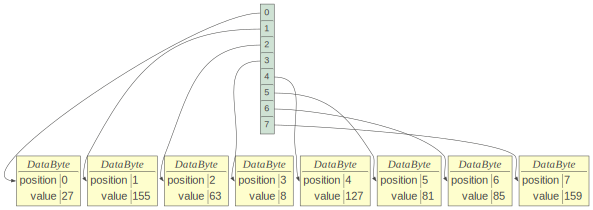

In [92]:
@dataclass()
class DataByte:
    def __init__(self, value, position: int):
        self.position = position
        self.value    = value

class SeedByte:
    def __init__(self, value):
        self.value = value

# points to actual data, last pointer in the chain
@dataclass()
class DataPointer:
    def __init__(self, value: bitarray, seed_byte: SeedByte, data_byte: DataByte):
        self.bits      = value.to01()
        self.value     = ba2int(value)
        self.seed_byte = seed_byte
        self.data_byte = data_byte

# points to next pointer, containing one seed byte and one seed or expansion byte
# (for "moving down")
@dataclass()
class SeedPointer:
    def __init__(self, value: bitarray, left=None, right=None):
        self.bits  = value.to01()
        self.value = ba2int(value)
        self.left  = left
        self.right = right

# contains two 4-bit pointers, each pointer expands to 1 byte recursively (produces NextPointerByte or ExpansionPointerByte)
# uses seed from previous level pointer
# (for "moving left/right")
# this kind of pointers used to align bytes to expansion tree: each level of expansion aligned with byte position
# for 8-byte data, pointer tree must contain: 
# - 4 expansion pointers to data bytes (2 byte per pointer)
# - 2 expansion pointers to previous pointers (4 byte per pointer)
# - 1 final expansion pointer that actually a root of all 8-byte tree (8 bytes per pointer)
@dataclass()
class ExpansionPointerByte:
    def __init__(self, seed: int, value: bitarray, left=None, right=None):
        self.seed  = seed
        self.bits  = value.to01()
        self.value = ba2int(value)
        self.left  = left
        self.right = right

@dataclass()
class NestedByte:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left  = left
        self.right = right

def decode_nested_byte(data_bits: bitarray):
    pass

tree_data_bits = data[0:8*8]
nested_bytes   = list()
for byte_id in range(0, 8):
    start_bit       = byte_id * 8
    end_bit         = start_bit + 8
    tree_byte_value = tree_data_bits[start_bit:end_bit]
    nested_byte     = DataByte(value=ba2int(tree_byte_value), position=byte_id)
    nested_bytes.append(nested_byte)

def find_common_prev_bytes(first_byte: int, second_byte: int) -> Dict[int, int]:
    prev_bytes        = defaultdict(dict)
    first_prev_bytes  = get_prev_bytes(byte_value=first_byte)
    second_prev_bytes = get_prev_bytes(byte_value=second_byte)
    for first_prev_byte_id in range(0, len(first_prev_bytes)):
        first_prev_byte = first_prev_bytes[first_prev_byte_id]
        for second_prev_byte_id in range(0, len(second_prev_bytes)):
            second_prev_byte = second_prev_bytes[second_prev_byte_id]
            if (first_prev_byte == second_prev_byte):
                common_prev_byte = first_prev_byte
                prev_bytes[common_prev_byte] = {
                    first_byte  : first_prev_byte_id,
                    second_byte : second_prev_byte_id
                }
    return prev_bytes

def has_common_prev_bytes(first_byte: int, second_byte: int) -> bool:
    common_prev_bytes = find_common_prev_bytes(first_byte=first_byte, second_byte=second_byte)
    return (len(common_prev_bytes) > 0)

treeviz(nested_bytes)


In [95]:
byte_0_prev_bytes = get_prev_bytes(byte_value=nested_bytes[2].value)
print(f"{nested_bytes[2].value}: prev={byte_0_prev_bytes}")

byte_1_prev_bytes = get_prev_bytes(byte_value=nested_bytes[3].value)
print(f"{nested_bytes[3].value}: prev={byte_1_prev_bytes}")

common_prev_bytes = find_common_prev_bytes(first_byte=nested_bytes[2].value, second_byte=nested_bytes[3].value)
print(common_prev_bytes)

63: prev=[63, 64, 128, 192, 193, 194, 196, 200, 208, 224]

8: prev=[8, 119, 183, 215, 231, 243, 245, 246, 247, 255]

defaultdict(<class 'dict'>, {})

In [10]:
def data_bits_to_data_items(data: bitarray, level: int) -> List[NestedDataItem]:
    byte_length = 2 ** level
    bit_length  = 8 * byte_length
    if (len(data) != bit_length):
        raise Exception(f"Incorrect data length: {len(data)} (bit_length={bit_length}, byte_length={byte_length}, level={level})")
    data_items  = list()
    position    = 0
    for byte_id in range(0, byte_length):
        start_bit  = byte_id * 8
        end_bit    = start_bit + 8
        byte_value = data[start_bit:end_bit]
        data_item  = NestedDataItem(
            weight    = 0,
            position  = position,
            type      = DataItemType.DATA,
            data      = byte_value.copy(),
            height    = 0,
        )
        data_items.append(data_item)
        position += 1
    return data_items

data_items = data_bits_to_data_items(data=data[0:8*8], level=3)
pprint(data_items)

[
│   NestedDataItem(
│   │   weight=0,
│   │   position=0,
│   │   type=DATA(0),
│   │   data=bitarray('00011011'),
│   │   height=0,
│   │   length=8,
│   │   value=27,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=1,
│   │   type=DATA(0),
│   │   data=bitarray('10011011'),
│   │   height=0,
│   │   length=8,
│   │   value=155,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=2,
│   │   type=DATA(0),
│   │   data=bitarray('00111111'),
│   │   height=0,
│   │   length=8,
│   │   value=63,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=3,
│   │   type=DATA(0),
│   │   data=bitarray('00001000'),
│   │   height=0,
│   │   length=8,
│   │   value=8,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=4,
│   │   type=DATA(0),
│   │   data=bitarray('01111111'),
│   │   height=0,
│   │   length=8,
│   │   value=127,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=5,
│   │   type=DATA(0),
│   │   data=bitarray('01010001'),
│   │   height=0,
│   │   length=8,
│   │   value=81,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=6,
│   │   type=DATA(0),
│   │   data=bitarray('01010101'),
│   │   height=0,
│   │   length=8,
│   │   value=85,
│   │   left=None,
│   │   right=None
│   ),
│   NestedDataItem(
│   │   weight=0,
│   │   position=7,
│   │   type=DATA(0),
│   │   data=bitarray('10011111'),
│   │   height=0,
│   │   length=8,
│   │   value=159,
│   │   left=None,
│   │   right=None
│   )
]

In [5]:
@dataclass()
class LayerHeader:
    # header position inside chain (starting from data layer 0)
    header_id      : int            = field()
    # data layer id: None if no data transformations will be performed (type "11")
    data_layer_id  : int | None     = field()
    type           : HeaderType     = field()
    header_bytes   : Dict[int, int] = field()
    #prefix_byte    : int        = field()

    def __init__(self, header_id: int, type: HeaderType, header_byte_0: int, header_byte_1: int, data_layer_id: int=None):
        self.header_id = header_id
        self.type      = type
        if (self.type != HeaderType.SKIP_11) and (data_layer_id is None):
            raise Exception(f"Required data_layer_id={data_layer_id} not set")
        self.data_layer_id   = data_layer_id
        self.header_bytes    = dict()
        self.header_bytes[0] = header_byte_0
        self.header_bytes[1] = header_byte_1
    
    def get_data_seed_bytes(self) -> List[int]:
        if (self.type == HeaderType.LAST_00):
            return [self.header_bytes[0], self.header_bytes[1]]
        elif (self.type == HeaderType.NEXT_01):
            return [self.header_byte_0]
        elif (self.type == HeaderType.NEXT_10):
            return [self.header_byte_1]
        elif (self.type == HeaderType.SKIP_11):
            return []
        else:
            raise Exception(f"Incorrect type={self.type}")
    
    def get_pointer_seed_bytes(self) -> List[int]:
        if (self.type == HeaderType.LAST_00):
            return []
        elif (self.type == HeaderType.NEXT_01):
            return [self.header_byte_1]
        elif (self.type == HeaderType.NEXT_10):
            return [self.header_byte_0]
        elif (self.type == HeaderType.SKIP_11):
            return [self.header_bytes[0], self.header_bytes[1]]
        else:
            raise Exception(f"Incorrect type={self.type}")
    





In [ ]:
# TODO: tree id, order of trees, common "x-ray" seed chain
#@dataclass()
#class SeedChain:
#    seeds : List[LayerHeader]
    
@dataclass()
class ItemTreeSlots:
    level       : int                  = field()
    

@dataclass()
class DataItemTree:
    level       : int                  = field()
    data        : bitarray             = field()
    #root        : NestedDataItem       = field(init=False, default=None)
    data_items  : List[NestedDataItem] = field(init=False, default=None)
    layer_seeds : List[int]            = field(init=False, default=None)

    def __init__(self, level: int, data: bitarray):
        self.level      = level
        self.data       = data.copy()
        self.data_items = data_bits_to_data_items(data=self.data, level=self.level)
    
    def collect_target_items(self) -> List[NestedDataItem]:
        pass

    def data_items_by_weight(self, weight: int) -> Sequence[NestedDataItem]:
        pass

In [ ]:
def get_nested_item_pair_inside_tree(data_item: NestedDataItem):
    pass

In [ ]:
def create_data_item_tree(data: bitarray, level: int):
    byte_length = 2 ** level
    bit_length  = 8 * byte_length
    if (len(data) != bit_length):
        raise Exception(f"Incorrect data length: {len(data)} (bit_length={bit_length}, byte_length={byte_length}, level={level})")
    

In [ ]:
@dataclass()
class RainbowRange:
    chained_range : ChainedRange = field()

In [4]:
@dataclass()
class RainbowGenerator:
    seed            : int              = field(default=0)
    generator       : CMWC             = field(default=None, init=False)
    values          : Sequence[int]    = field(default=None, init=False)
    sub_generator   : RainbowGenerator = field(default=None, init=False)

    def __init__(self, seed: int=0):
        self.seed            = seed
        self.values          = range(0, 256)
        self.generator       = CMWC(x=self.seed)
        self.sub_generator   = None
    
    def get_sub_generator(self) -> RainbowGenerator:
        if (self.sub_generator is None):
            self.sub_generator = RainbowGenerator()
        return self.sub_generator

    def set_seed(self, seed: int):
        self.seed = seed
        self.generator.seed(seed=seed)

    def get_rainbow_bytes(self, seed: int=None) -> Iterable[int]:
        if (seed is not None):
            self.set_seed(seed=seed)
        return sorted(self.generator.sample(self.values, k=8))
    
    def next_bytes_for_seed(self, seed: int) -> SortedSet[int] | Set[int]:
        return self.get_rainbow_bytes(seed=seed)
    
    def prev_bytes_for_seed(self, seed: int) -> SortedSet[int] | Set[int]:
        return self.get_prev_seeds(seed=seed)
    
    def get_prev_seeds(self, seed: int=None) -> SortedSet[int]:
        prev_seeds = SortedSet()
        if (seed is None):
            seed = self.seed
        generator = self.get_sub_generator()
        for prev_seed in range(0, 256):
            rainbow = generator.get_rainbow_bytes(seed=prev_seed)
            if seed in rainbow:
                prev_seeds.add(prev_seed)
        return prev_seeds
    
    def get_prev_bytes(self, next_byte: int=None) -> SortedSet[int]:
        return self.get_prev_seeds(seed=next_byte)
    
    def has_prev_seed(self, prev_seed: int, next_seed: int=None) -> bool:
        prev_seeds = self.get_prev_seeds(seed=next_seed)
        return (prev_seed in prev_seeds)

    def has_prev_seeds(self, target_seeds: SortedSet[int], next_seed: int=None) -> bool:
        prev_seeds = self.get_prev_seeds(seed=next_seed)
        for target_seed in target_seeds:
            if (target_seed not in prev_seeds):
                return False
        return True
    
    def get_next_seeds(self, seed: int=None) -> SortedSet[int]:
        return self.get_rainbow_bytes(seed=seed)
    
    def has_next_byte(self, seed: int, next_byte: int) -> bool:
        rainbow = self.get_rainbow_bytes(seed=seed)
        return self.has_rainbow_byte(rainbow=rainbow, byte_value=next_byte)
    
    def has_next_bytes(self, seed: int, next_bytes: Iterable[int]) -> bool:
        rainbow = self.get_rainbow_bytes(seed=seed)
        return self.has_all_rainbow_bytes(rainbow=rainbow, byte_values=next_bytes)
    
    def has_prev_byte(self, seed: int, prev_byte: int) -> bool:
        return self.has_prev_seed(prev_seed=prev_byte, next_seed=seed)
    
    def has_rainbow_byte(self, rainbow: Set[int], byte_value: int) -> bool:
        return (byte_value in rainbow)
    
    def has_all_rainbow_bytes(self, rainbow: Set[int], byte_values: Iterable[int]) -> bool:
        for value in byte_values:
            if (self.has_rainbow_byte(rainbow=rainbow, byte_value=value) is False):
                return False
        return True
    
    def get_byte_by_id(self, seed: int, byte_id: int) -> int:
        rainbow = self.get_rainbow_bytes(seed=seed)
        return rainbow[byte_id]
    
    def only_seeds_with_next_byte(self, seeds: SortedSet[int], next_byte: int) -> SortedSet[int]:
        filtered_seeds = SortedSet()
        generator      = self.get_sub_generator()
        for seed in seeds:
            if (generator.has_next_byte(seed=seed, next_byte=next_byte) is True):
                filtered_seeds.add(seed)
        return filtered_seeds
    
    def only_seeds_with_all_next_bytes(self, seeds: SortedSet[int], next_bytes: SortedSet[int]) -> SortedSet[int]:
        filtered_seeds = SortedSet()
        generator      = self.get_sub_generator()
        for seed in seeds:
            if (generator.has_next_bytes(seed=seed, next_bytes=next_bytes) is True):
                filtered_seeds.add(seed)
        return filtered_seeds
    
    def only_seeds_with_prev_byte(self, seeds: SortedSet[int], prev_byte: int) -> SortedSet[int]:
        filtered_seeds = SortedSet()
        generator      = self.get_sub_generator()
        for seed in seeds:
            if (generator.has_prev_byte(seed=seed, prev_byte=prev_byte) is True):
                filtered_seeds.add(seed)
        return filtered_seeds
    
    def all_seeds_with_next_byte(self, next_byte: int) -> SortedSet[int]:
        return self.only_seeds_with_next_byte(seeds=range(0, 256), next_byte=next_byte)
    
    def all_seeds_with_prev_byte(self, prev_byte: int) -> SortedSet[int]:
        return self.only_seeds_with_prev_byte(seeds=range(0, 256), prev_byte=prev_byte)
        
rg = RainbowGenerator(seed=0)
rainbow_bytes = rg.get_rainbow_bytes(seed=2)
print(f"rainbow_bytes={rainbow_bytes}")

prev_seeds = rg.get_prev_seeds(seed=27)
print(f"prev_seeds={prev_seeds}")

for _ps in prev_seeds:
    rainbow_bytes = rg.get_rainbow_bytes(seed=_ps)
    print(f"prev_seed={_ps}, rainbow={rainbow_bytes}, {rg.get_byte_by_id(seed=_ps, byte_id=7)}")

[6, 28, 68, 76, 112, 205, 245, 251]

SortedSet([124, 126, 142, 169, 182, 204])

prev_seed=124, rainbow=[27, 49, 99, 132, 134, 214, 222, 234], 234

prev_seed=126, rainbow=[27, 61, 112, 131, 133, 134, 210, 255], 255

prev_seed=142, rainbow=[17, 27, 53, 136, 158, 159, 173, 174], 174

prev_seed=169, rainbow=[27, 54, 83, 99, 111, 181, 187, 227], 227

prev_seed=182, rainbow=[19, 27, 51, 52, 183, 184, 213, 226], 226

prev_seed=204, rainbow=[19, 25, 27, 33, 129, 164, 208, 224], 224